## Курсовая работа

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import datasets, svm, metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from graphviz import Source
from sklearn import tree
plt.rcParams['figure.figsize'] = (14.0, 6.0)

**Информация о наборе данных:**

Датасет состоит из различной информации, связанной с поведением клиентов на веб-сайтах онлайн-магазтнов.
Набор данных состоит из 10 числовых и 8 категориальных атрибутов. 

--------
**Описание каждой колонки:**  
Administrative: Количество главных страниц, просмотренное покупателем;  
Administrative_Duration: Время просмотра главных страниц в секундах;  
Informational: Количество посещенных пользователем информационных страниц;  
Informational_Duration: Время просмотра информационных страниц в секундах;  
ProductRelated: Количество посещенных страниц, связанных с товаром;  
ProductRelated_Duration: Время просмотра страниц с товаром в секундах;  
BounceRates: Измеряет процент посетителей, которые после посещения страницы покидают ее, не предпринимая каких-либо дополнительных действий (таких как нажатие на ссылку или переход на вторую страницу);  
ExitRates: Коэффициент выхода показывает, как часто посетители выходили с сайта после посещения любого количества других страниц сайта в одном сеансе;  
PageValues: Среднее значение страницы, рассчитываемое путем деления стоимости покупки на количество просмотренных страниц; Значение страницы - это среднее значение страницы, которую посетил пользователь перед тем, как попасть на целевую страницу или завершить транзакцию электронной торговли (или обе). Это значение предназначено для того, чтобы дать вам представление о том, какая страница на вашем сайте принесла больше дохода. Если страница каким-либо образом не была вовлечена в транзакцию электронной торговли для вашего веб-сайта, то значение страницы для этой страницы будет равно $ 0, поскольку эта страница никогда не посещалась в сеансе, где произошла транзакция.
("Bounce Rate", "Exit Rate" и "Page Value" признаки собранные "Google Analytics" для кажой страницы на сайте)  
SpecialDay: Близость дня просмотра страницы к праздничному дню;  
Month: Месяц;  
OperatingSystems: Операционная система;  
Browser: Браузер;  
Region: Регион покупателя;  
TrafficType: Тип трафика, к которому принадлежит пользователь;  
VisitorType: Тип пользователя (новый, вернувшийся, другой);  
Weekend: Выходной (да, нет);  
Revenue: Совершение транзакции (да, нет) 

**В качестве целевой переменной будем использовать 'Revenue'**


**Reading the Dataset**

In [2]:
# reading the dataset
data = pd.read_csv('online_shoppers_intention.csv')
# checking the shape of the data
data.shape

(12330, 18)

## Проведение разведочного анализа данных

In [3]:
# checking the head of the data

data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
# describing the data

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# checking the percentage of missing data contains in all the columns

missing_percentage = data.isnull().sum()/data.shape[0]
print('the percentage of missing data contains in all the columns:')
print()
print(missing_percentage)

the percentage of missing data contains in all the columns:

Administrative             0.001135
Administrative_Duration    0.001135
Informational              0.001135
Informational_Duration     0.001135
ProductRelated             0.001135
ProductRelated_Duration    0.001135
BounceRates                0.001135
ExitRates                  0.001135
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64


Процент пропущенных значений небольшой, поэтому мы можем просто удалить строки с пропущенными значениями.

In [6]:
data=data.dropna()
data.shape

(12316, 18)

In [7]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

## Визуализация данных

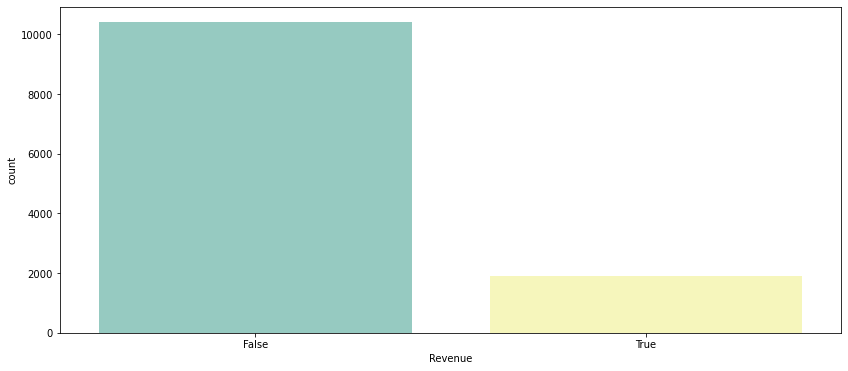

In [8]:
sns.countplot(data['Revenue'], palette='Set3')

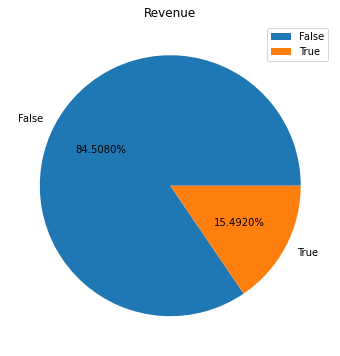

In [9]:
#pie chart for revenue
labels = ['False', 'True']
plt.title("Revenue")
plt.pie(data.Revenue.value_counts(), labels = labels, autopct = '%.4f%%')
plt.legend()

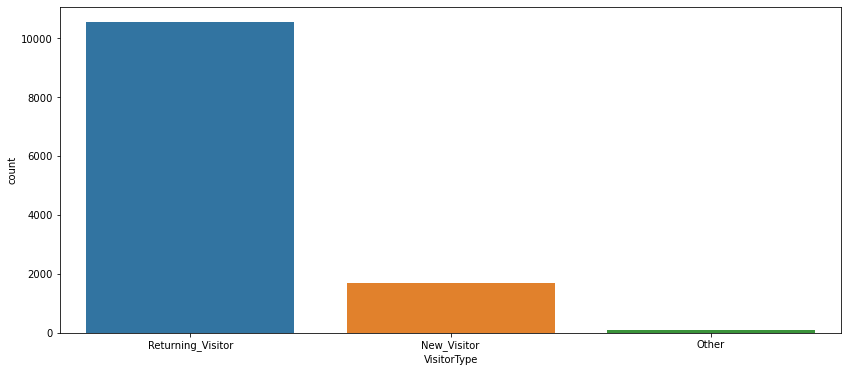

In [10]:
#different users
sns.countplot(x = data.VisitorType)

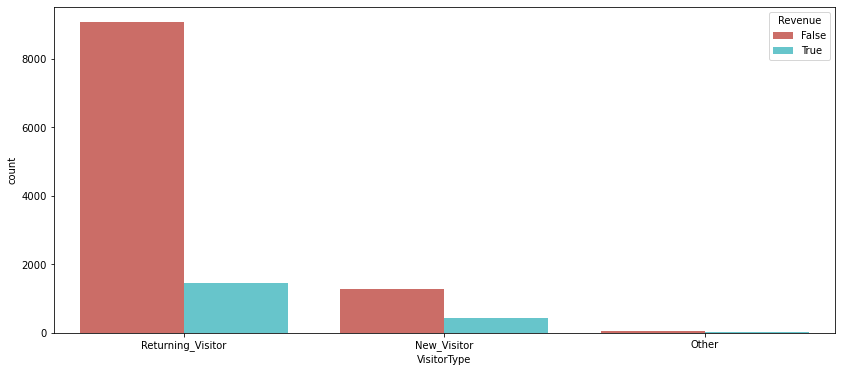

In [11]:
sns.countplot(data["VisitorType"],hue=data["Revenue"],palette="hls")

Text(0.5, 1.0, 'Purchase on Weekends')

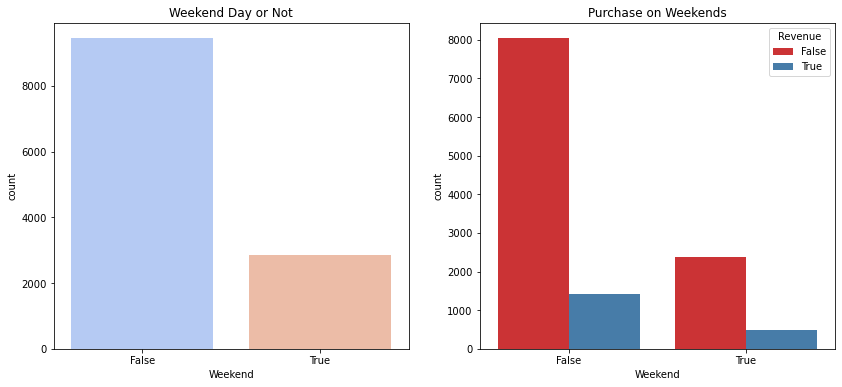

In [12]:
plt.subplot(1,2,1)
sns.countplot(data["Weekend"],palette="coolwarm");
plt.title('Weekend Day or Not')
plt.subplot(1,2,2)
sns.countplot(data["Weekend"],hue=data["Revenue"],palette="Set1");
plt.title('Purchase on Weekends')

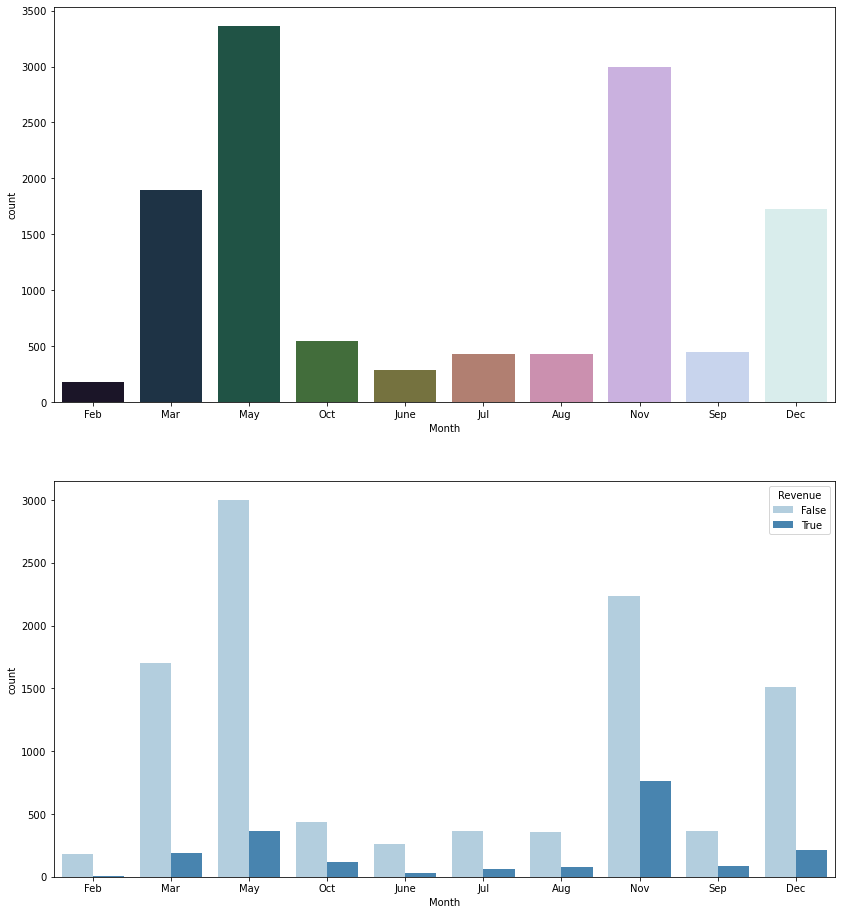

In [13]:
f,ax=plt.subplots(2,1,figsize=(14,16))
sns.countplot(data["Month"],palette="cubehelix",ax=ax[0]);

sns.countplot(data["Month"],hue=data["Revenue"],palette="Blues",ax=ax[1]);


Text(0.5, 1.0, 'Special day destribution')

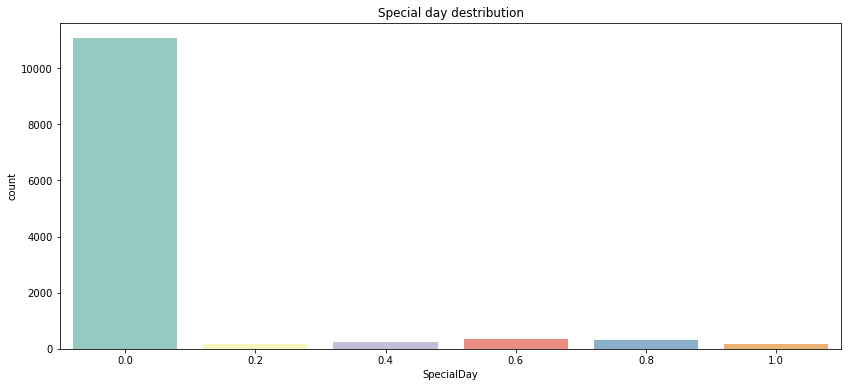

In [14]:

sns.countplot(data['SpecialDay'], palette='Set3')
plt.title('Special day destribution')


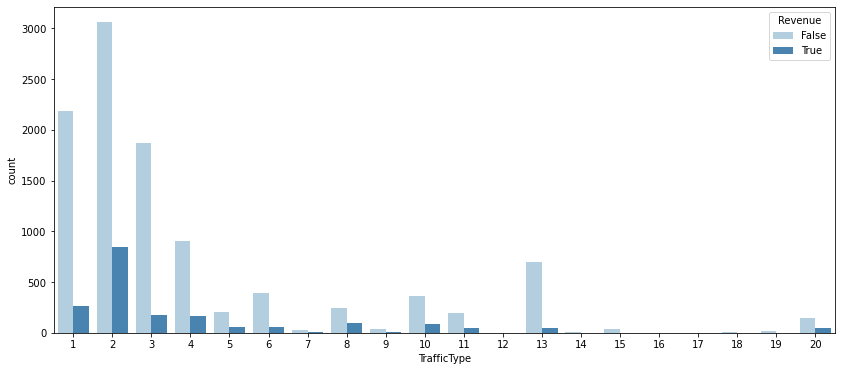

In [15]:
sns.countplot(data["TrafficType"],hue=data["Revenue"],palette="Blues");

Traffic Source 2 is the best advertising source for the website. Should consider other sources and decide whether it is needed or not

Text(0, 0.5, 'count')

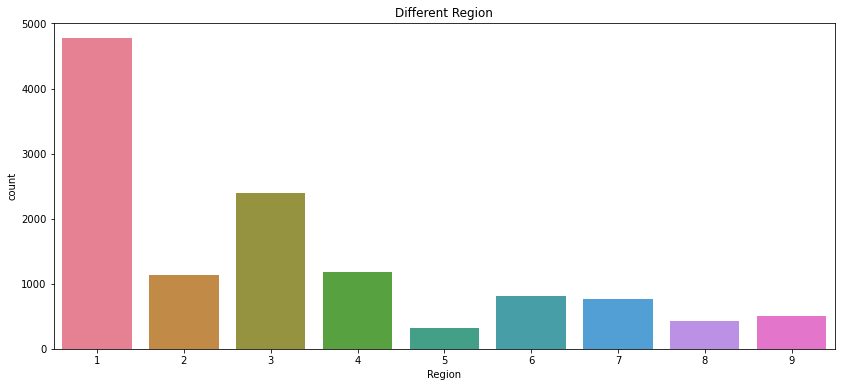

In [16]:
# Distribution of customers based on Region
sns.countplot(data['Region'],palette='husl')
plt.title('Different Region')
plt.xlabel('Region')
plt.ylabel('count')

The website is common among region 1 customers. Should give promotions in other regions to improve sales

## Проведение корреляционного анализа данных

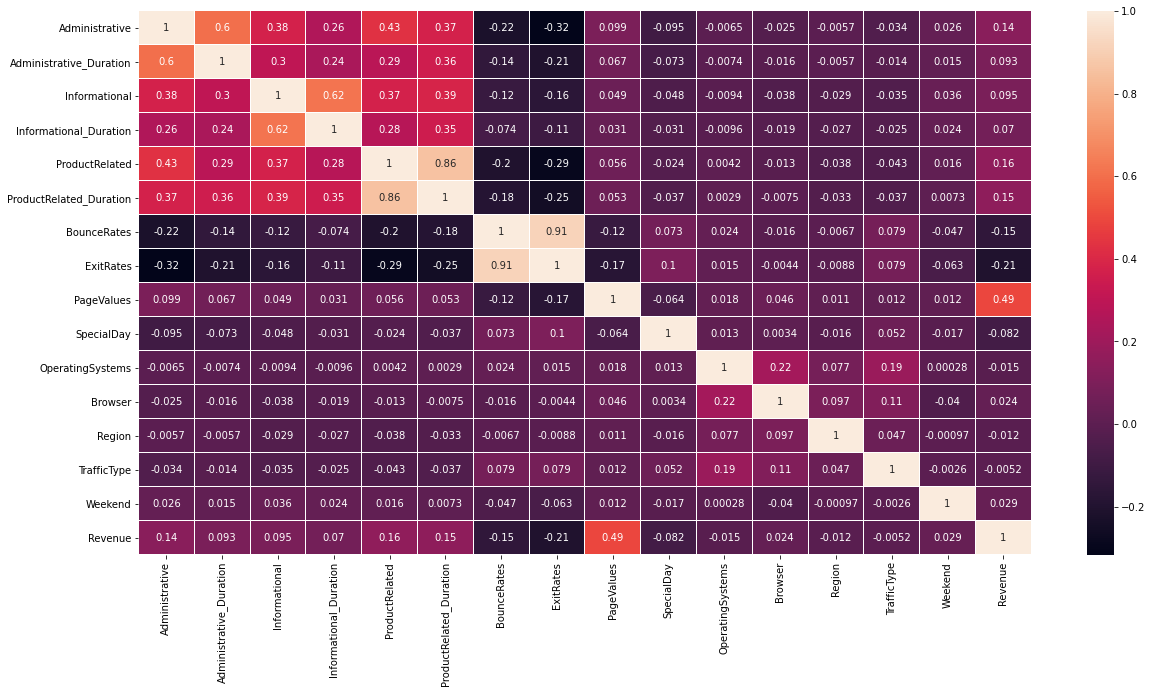

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,linewidths=.05);

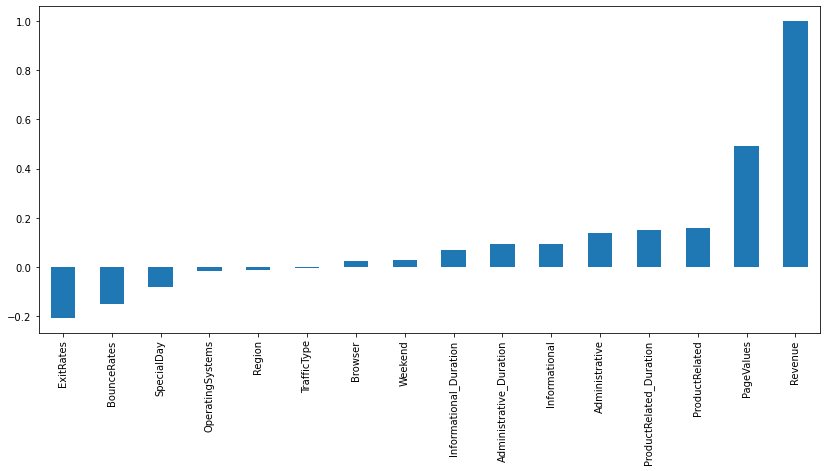

In [18]:
data.corr()['Revenue'].sort_values().plot(kind='bar')

Целевой признак классификации "Revenue" наиболее сильно коррелирует с "PageValues" (0.49)  
Признаки "BounceRates" и "ExitRates" is highly сильно коррелируют между собой (0.91), поэтому один из них мы использовать не будем.  
"ProductRelated_Duration" и ProductRelated тоже сильно коррелируют между собой (0.86).
  



Удалим коррелирующие признаки.

In [19]:
data.drop(['ProductRelated_Duration', 'ExitRates'], axis = 1, inplace = True)

## Масштабирование данных

In [20]:
scale_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',\
             'BounceRates','PageValues']

In [21]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [22]:
data_scale=pd.DataFrame()
for i in range(len(scale_cols)):
    col = scale_cols[i]    
    data_scale[col] = sc1_data[:,i]

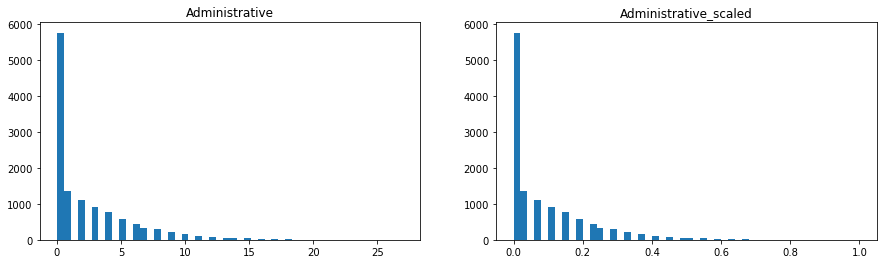

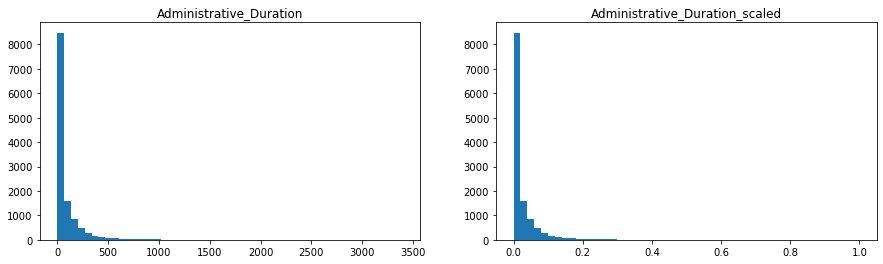

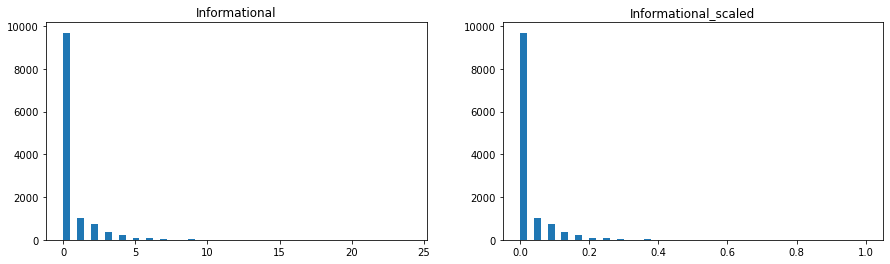

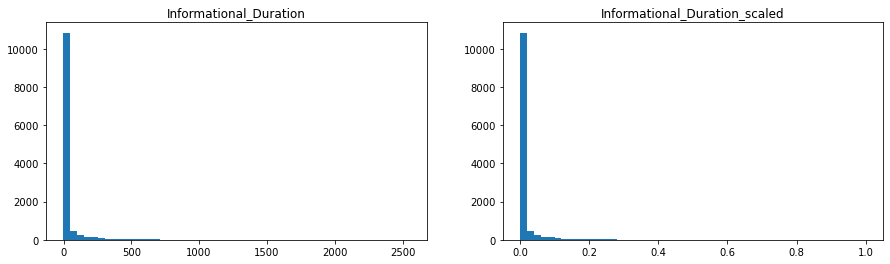

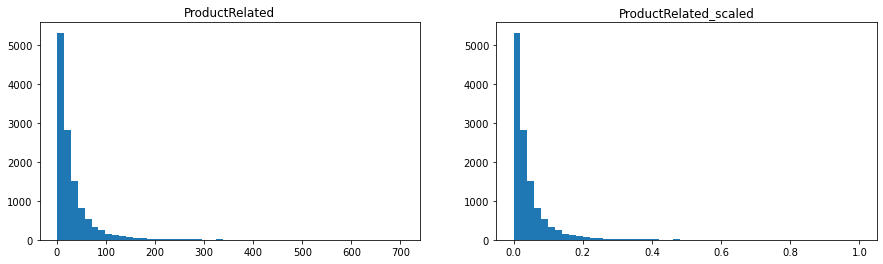

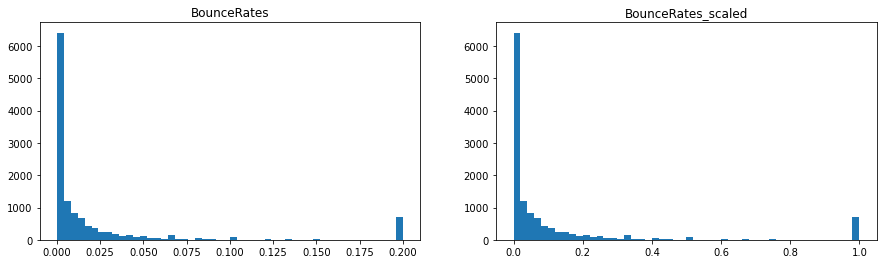

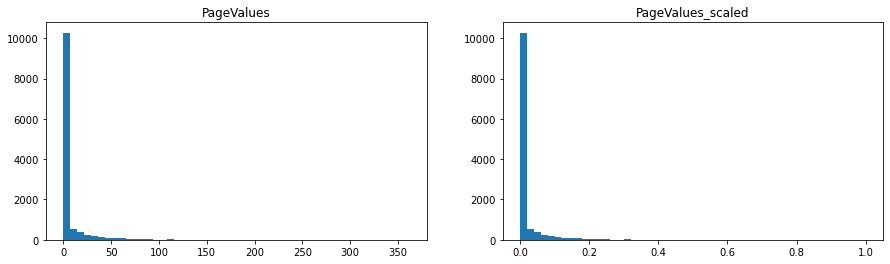

In [23]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols: 
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].hist(data[col], 50)
    ax[1].hist(data_scale[col], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col+'_scaled')
    plt.show()

**Видим, что распределения сохранились, поэтому масштабируем данные.**



In [24]:
data[scale_cols] = sc1.fit_transform(data[scale_cols])
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.085844,0.024092,0.020999,0.013922,0.045055,0.110762,0.016298,0.061497,2.124147,2.357584,3.148019,4.070477
std,0.123065,0.052022,0.052946,0.055218,0.063107,0.242136,0.051354,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000294,0.000000,0.000392,0.009929,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.037037,0.002647,0.000000,0.000392,0.025532,0.015597,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,0.148148,0.027796,0.000000,0.000392,0.053901,0.083418,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,13.000000,9.000000,20.000000


## Кодирование категориальных признаков

**В нашем датасете присутствуют категориальные признаки, часть из них уже закодированы с помощью  LabelEncoding (OperatingSystems,Browser,Region,TrafficType).  
Закодируем остальные.**


In [25]:
data = pd.get_dummies(data, columns = ['SpecialDay','Month','OperatingSystems', 'Browser', 'Region', \
                                             'TrafficType', 'Weekend','VisitorType'])

In [26]:
le=LabelEncoder()

In [27]:
data['Revenue']= le.fit_transform(data['Revenue'])

In [28]:
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Revenue,SpecialDay_0.0,SpecialDay_0.2,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Weekend_False,Weekend_True,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.000294,0.0,0.000392,0.001418,1.00,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0.0,0.000294,0.0,0.000392,0.002837,0.00,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,0.000000,0.0,0.000000,0.001418,1.00,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0.0,0.000294,0.0,0.000392,0.002837,0.25,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,0.000294,0.0,0.000392,0.014184,0.10,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


## В качестве метрик для решения задачи классификации будем использовать:
* Метрика accuracy
* Метрика precision
* Метрика recall (полнота)
* Метрика F1-мера
* Метрика ROC AUC
* Матрица ошибок или Confusion Matrix

## Для решения задачи классификации будем использовать следующие модели:

* Логистическая регрессия
* Метод ближайших соседей
* Машина опорных векторов
* Решающее дерево
* Случайный лес
* Градиентный бустинг

## Формирование обучающей и тестовой выборок

In [29]:
x = data.drop(['Revenue'], axis = 1)
y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (12316, 78)
Shape of y: (12316,)


In [30]:
# splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
#from imblearn.over_sampling import RandomOverSampler

#rus = RandomOverSampler(sampling_strategy=0.5)
#x, y = rus.fit_sample(x, y)
#plot_2d_space(x, y, 'Random under-sampling')

In [32]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure(figsize=(6,5))
    
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [33]:
# Модели
clas_models = {'LogR': LogisticRegression(max_iter=2000), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [34]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [35]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

## Baseline

In [36]:
def clas_train_model(model_name, model,clasMetricLogger):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print()
    print()
    print(model)
    print()
    print('accuracy={}, precision={}, recall={}, f1={}, roc_auc={}'.format(round(accuracy, 3), round(precision, 3),\
                                                                           round(recall, 3),round(f1, 3),round(roc_auc, 3)))
    
    clasMetricLogger.add('accuracy', model_name, accuracy)
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)
   
    plt.rcParams['figure.figsize'] = (6.0, 4.0)
    plot_confusion_matrix(model, x_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues, normalize='true')
    
    draw_roc_curve(y_test, y_pred, pos_label=1, average='micro')
    print('---------------------------------------------------------------------------')
    print()




LogisticRegression(max_iter=2000)

accuracy=0.883, precision=0.81, recall=0.306, f1=0.444, roc_auc=0.646


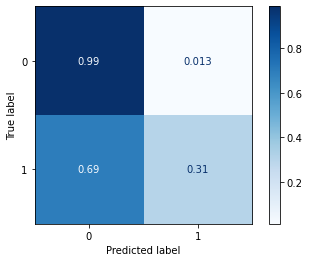

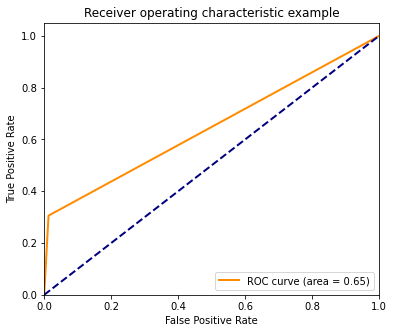

---------------------------------------------------------------------------



KNeighborsClassifier()

accuracy=0.856, precision=0.59, recall=0.191, f1=0.289, roc_auc=0.584


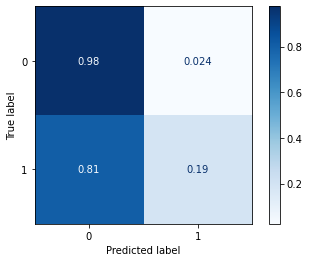

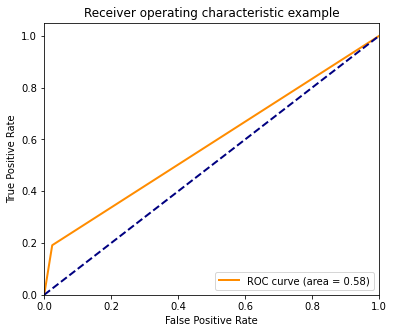

---------------------------------------------------------------------------



SVC()

accuracy=0.859, precision=0.833, recall=0.093, f1=0.167, roc_auc=0.545


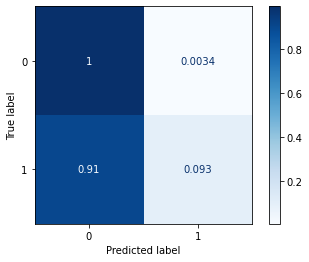

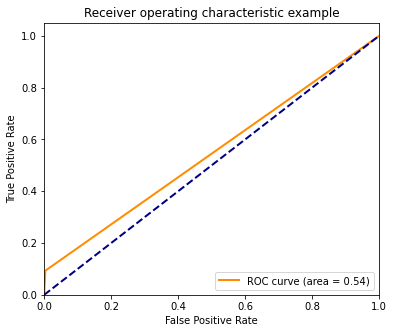

---------------------------------------------------------------------------



DecisionTreeClassifier()

accuracy=0.867, precision=0.564, recall=0.561, f1=0.563, roc_auc=0.742


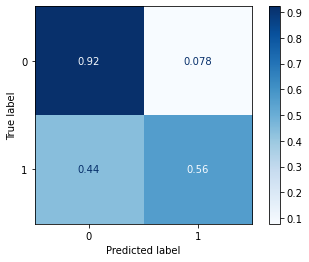

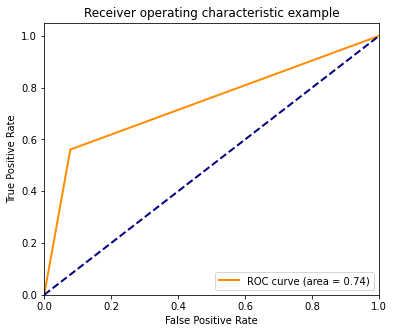

---------------------------------------------------------------------------



RandomForestClassifier()

accuracy=0.901, precision=0.751, recall=0.521, f1=0.615, roc_auc=0.745


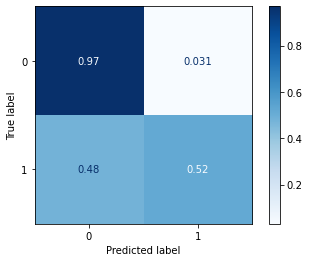

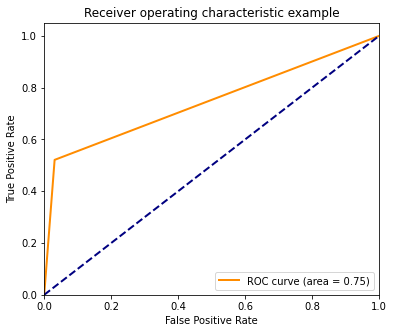

---------------------------------------------------------------------------



GradientBoostingClassifier()

accuracy=0.903, precision=0.723, recall=0.59, f1=0.65, roc_auc=0.775


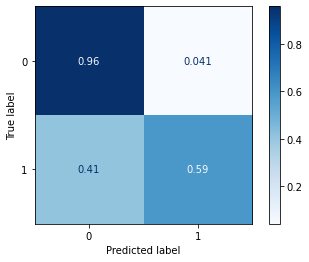

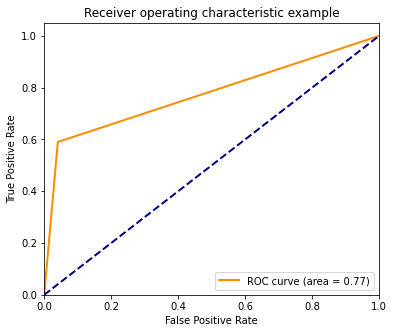

---------------------------------------------------------------------------



In [37]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [38]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], dtype=object)

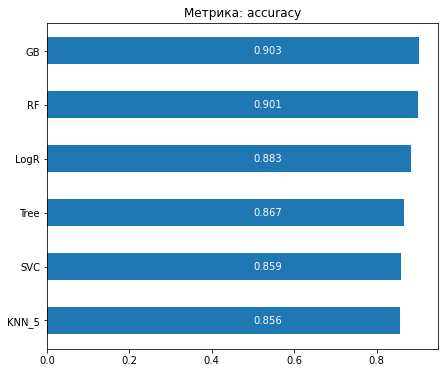

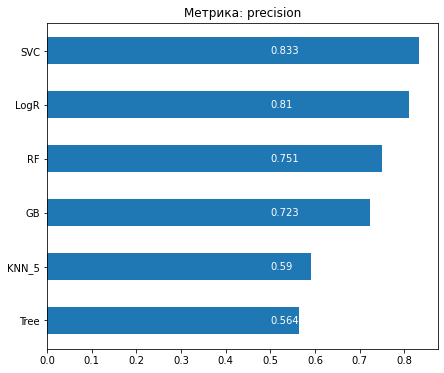

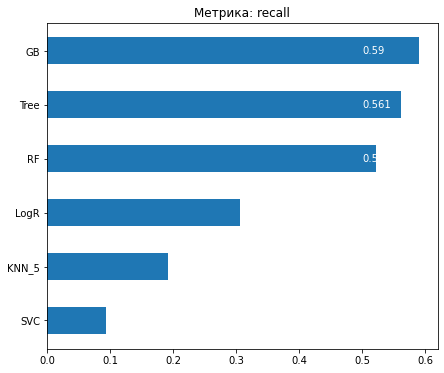

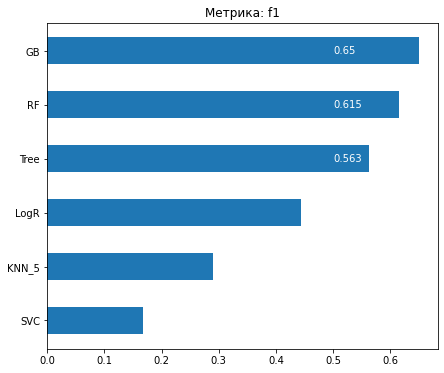

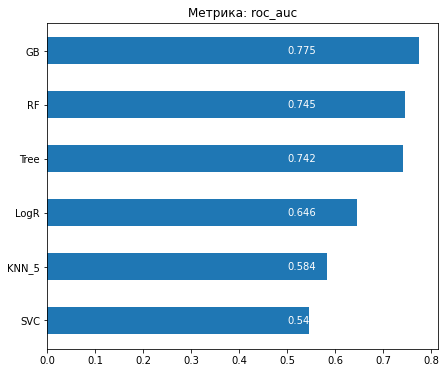

In [39]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

# Подбор гиперпараметров

## KNeighborsClassifier

In [40]:
n_range = np.array(range(5,130,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
          70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125])}]

In [41]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy',n_jobs=-1)
clf_gs.fit(x_train, y_train)

Wall time: 2min 22s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125])}],
             scoring='accuracy')

In [42]:
clf_gs.cv_results_;

In [43]:
# Лучшая модель
clf_gs.best_estimator_


KNeighborsClassifier(n_neighbors=15)

In [44]:
# Лучшее значение метрики
clf_gs.best_score_

0.852922915266285

In [45]:
# Лучшее значение параметров
clf_gs.best_params_


{'n_neighbors': 15}

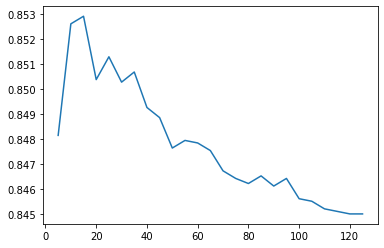

In [46]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [47]:
clas_models_grid = {'KNN_15':clf_gs.best_estimator_}

## LogisticRegression

In [48]:
param_grid = {'C': np.arange(1e-05, 3, 0.1)}

In [49]:
lr_gs = GridSearchCV(LogisticRegression(max_iter=2000), return_train_score=True,
                  param_grid=param_grid, scoring='roc_auc', cv=5)

In [50]:
lr_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': array([1.00000e-05, 1.00010e-01, 2.00010e-01, 3.00010e-01, 4.00010e-01,
       5.00010e-01, 6.00010e-01, 7.00010e-01, 8.00010e-01, 9.00010e-01,
       1.00001e+00, 1.10001e+00, 1.20001e+00, 1.30001e+00, 1.40001e+00,
       1.50001e+00, 1.60001e+00, 1.70001e+00, 1.80001e+00, 1.90001e+00,
       2.00001e+00, 2.10001e+00, 2.20001e+00, 2.30001e+00, 2.40001e+00,
       2.50001e+00, 2.60001e+00, 2.70001e+00, 2.80001e+00, 2.90001e+00])},
             return_train_score=True, scoring='roc_auc')

In [51]:
lr_gs.cv_results_

{'mean_fit_time': array([0.03111162, 0.07639604, 0.09733911, 0.09494882, 0.108111  ,
        0.12147598, 0.12347054, 0.15279102, 0.13444114, 0.14122248,
        0.14341931, 0.16017203, 0.15279112, 0.1466085 , 0.14561148,
        0.16276493, 0.16720791, 0.17940111, 0.17763624, 0.17772431,
        0.16894894, 0.17016287, 0.19675584, 0.21921206, 0.2021276 ,
        0.20545053, 0.18590293, 0.18331084, 0.19128938, 0.196874  ]),
 'std_fit_time': array([0.00461411, 0.01143437, 0.00645141, 0.00796845, 0.00559162,
        0.01042931, 0.01052407, 0.02000074, 0.0067472 , 0.01293666,
        0.00899938, 0.00706961, 0.0034767 , 0.00819998, 0.01209942,
        0.01742769, 0.01675564, 0.01875213, 0.01617758, 0.01235063,
        0.01089914, 0.01309772, 0.01962355, 0.02562301, 0.05271964,
        0.02019438, 0.01496117, 0.00562079, 0.00758   , 0.01192797]),
 'mean_score_time': array([0.00538568, 0.00558453, 0.00538483, 0.00498357, 0.00498638,
        0.00538445, 0.00518513, 0.00498695, 0.00518527, 0.00

In [52]:
lr_gs.best_estimator_

LogisticRegression(C=2.9000100000000004, max_iter=2000)

In [53]:
lr_gs.best_score_

0.8831837582528419

In [54]:
clas_models_grid['LogR_GridSearh']=LogisticRegression(C=2.9, max_iter=2000)

# DecisionTreeClassifier

In [55]:
data_nscaled = pd.read_csv('online_shoppers_intention.csv')

In [56]:
data_nscaled=data_nscaled.dropna()

In [57]:
data_nscaled.drop(['ProductRelated_Duration', 'ExitRates'], axis = 1, inplace = True)

In [58]:
data_nscaled['Revenue']= le.fit_transform(data_nscaled['Revenue'])

In [59]:
data_nscaled['VisitorType']=le.fit_transform(data_nscaled['VisitorType'])

In [60]:
data_nscaled['Month']=le.fit_transform(data_nscaled['Month'])

In [61]:
data_nscaled['Weekend']=le.fit_transform(data_nscaled['Weekend'])

In [62]:
data_nscaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0.0,0.0,0.0,0.0,2.0,0.00,0.0,0.0,2,2,2,1,2,2,0,0
2,0.0,-1.0,0.0,-1.0,1.0,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0.0,0.0,0.0,0.0,2.0,0.05,0.0,0.0,2,3,2,2,4,2,0,0
4,0.0,0.0,0.0,0.0,10.0,0.02,0.0,0.0,2,3,3,1,4,2,1,0


In [63]:
x_nscaled=data_nscaled.drop(['Revenue'], axis = 1)
y_nscaled = data_nscaled['Revenue']
print("Shape of x:", x_nscaled.shape)
print("Shape of y:", y_nscaled.shape)


Shape of x: (12316, 15)
Shape of y: (12316,)


In [64]:
xn_train, xn_test, yn_train, yn_test = train_test_split(x_nscaled, y_nscaled, test_size = 0.2, random_state = 0)

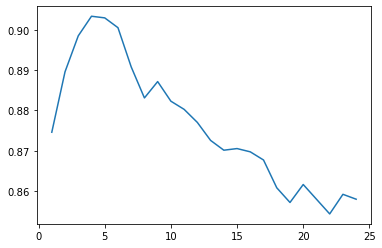

In [65]:
scores=[]
for i in range(1,25):
  tree_1=DecisionTreeClassifier(max_depth = i) 
  tree_1.fit(xn_train, yn_train) 
  scores.append(tree_1.score(xn_test,yn_test)) 
plt.plot(range(1,25),scores) 
plt.show()

In [66]:
tree_1=DecisionTreeClassifier(max_depth =4).fit(xn_train, yn_train)  

yn_pred = tree_1.predict(xn_test) 
classification_report(yn_test, yn_pred, output_dict = True)

{'0': {'precision': 0.9282407407407407,
  'recall': 0.9602490421455939,
  'f1-score': 0.9439736346516008,
  'support': 2088},
 '1': {'precision': 0.7269736842105263,
  'recall': 0.5877659574468085,
  'f1-score': 0.65,
  'support': 376},
 'accuracy': 0.9034090909090909,
 'macro avg': {'precision': 0.8276072124756335,
  'recall': 0.7740074997962012,
  'f1-score': 0.7969868173258003,
  'support': 2464},
 'weighted avg': {'precision': 0.8975279106858054,
  'recall': 0.9034090909090909,
  'f1-score': 0.8991140215716487,
  'support': 2464}}

In [67]:
clas_models_grid['Tree_4']=DecisionTreeClassifier(max_depth =4)

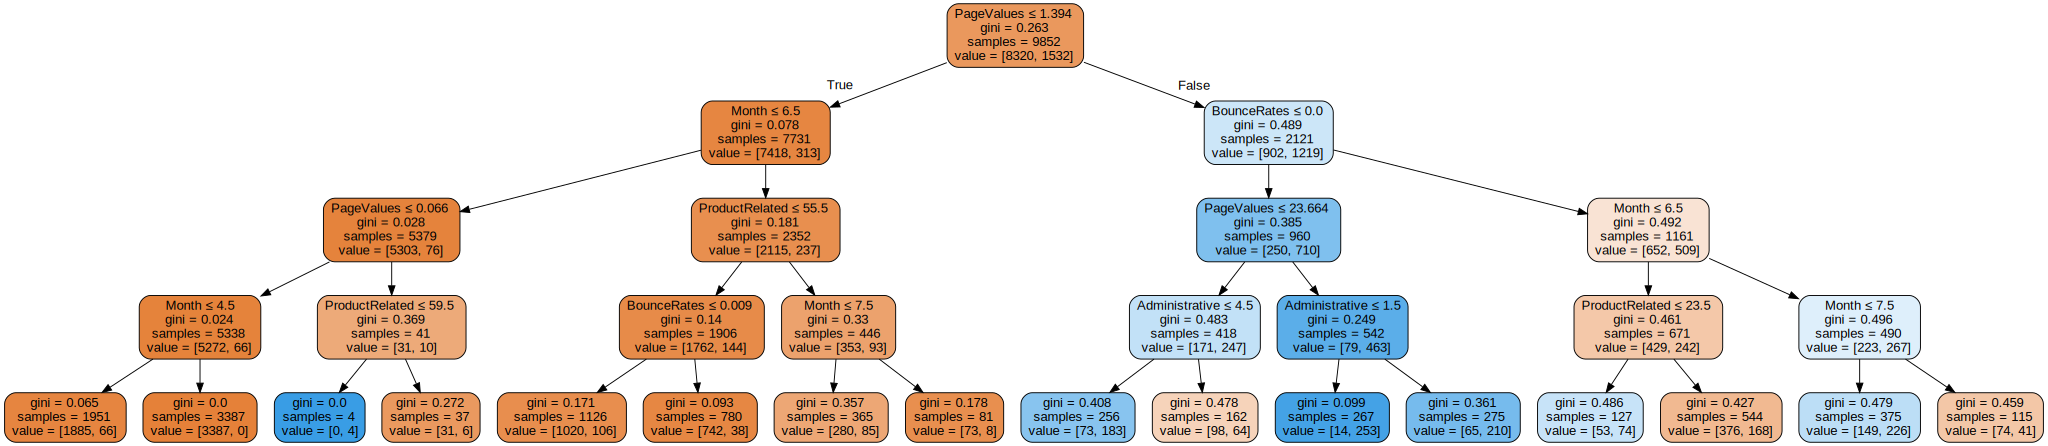

In [68]:
dot_data = export_graphviz(tree_1, out_file=None, 
                           feature_names=x_nscaled.columns, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

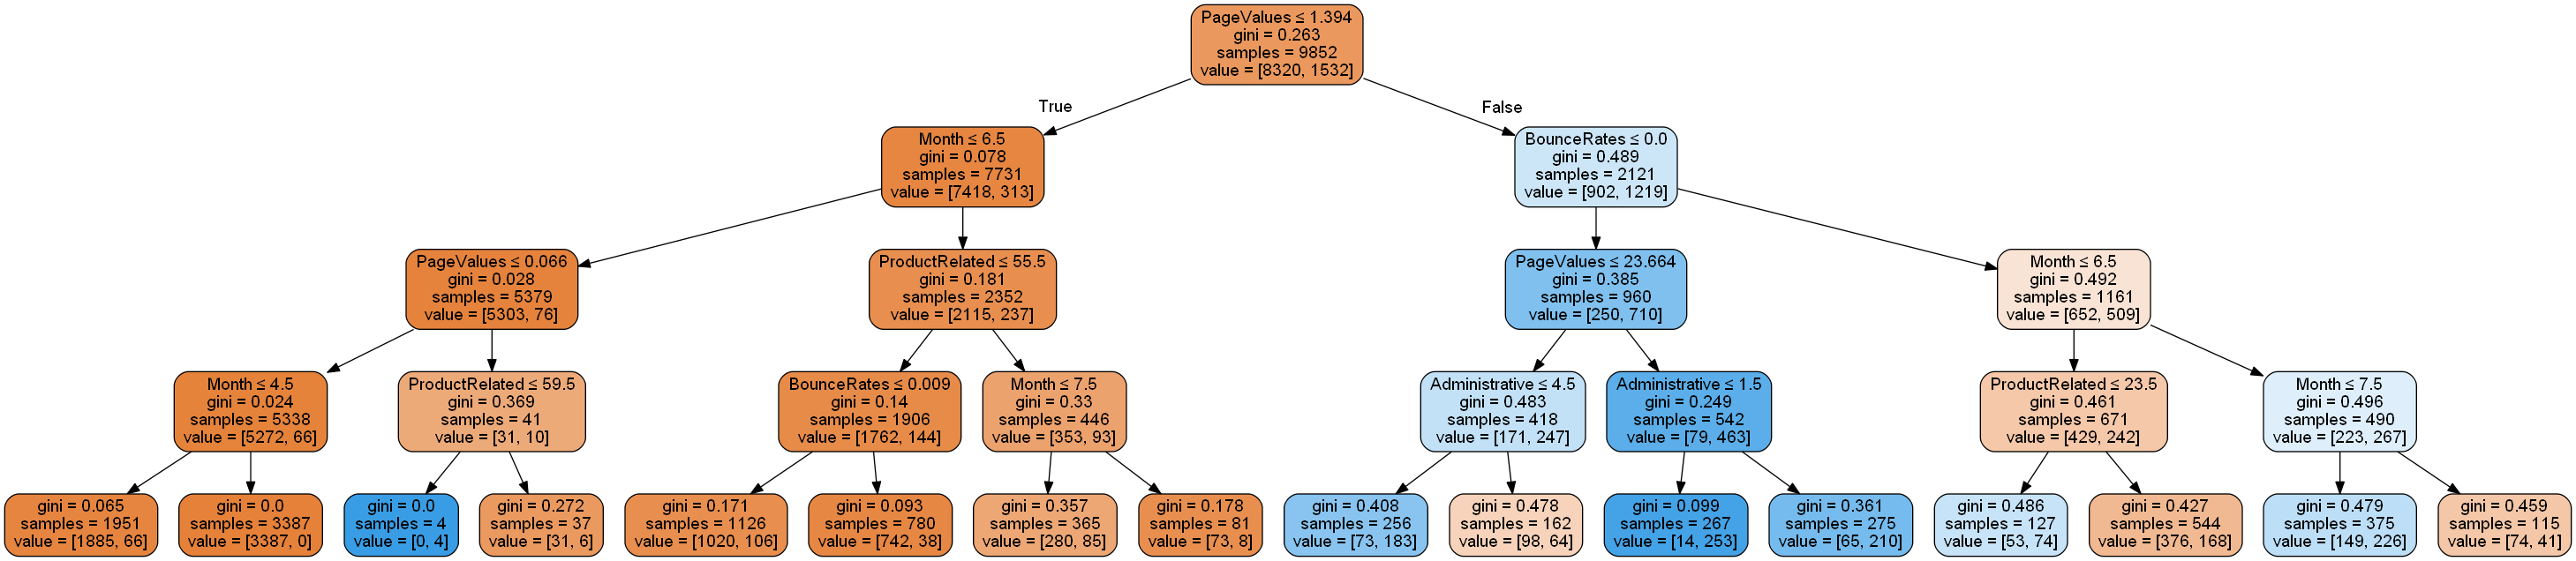

In [69]:
graph = Source(tree.export_graphviz(tree_1, out_file=None, feature_names=x_nscaled.columns, filled=True, rounded=True,\
                                     special_characters=True))
png_bytes = graph.pipe(format='png')
from IPython.display import Image
Image(png_bytes, width='100%')

In [70]:
# dt-grid
dt_grid = {'criterion':['gini'],
           #'max_features':['auto','sqrt','log2'],
           'max_features':np.arange(2,15),
           'splitter':['best','random'],
           'max_depth':np.arange(2,18)
           #'max_depth':[2,4,6,8,10,12,14,16]
          }

In [71]:
%%time
dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_grid, cv=5, scoring='precision',
                   verbose=2,
                    n_jobs=-1)
dt_gs.fit(xn_train, yn_train)

Fitting 5 folds for each of 416 candidates, totalling 2080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2012 tasks      | elapsed:   10.1s


Wall time: 10.6 s


[Parallel(n_jobs=-1)]: Done 2080 out of 2080 | elapsed:   10.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                         'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'splitter': ['best', 'random']},
             scoring='precision', verbose=2)

In [72]:
dt_gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'splitter': 'random'}

In [73]:
dt_gs.best_score_

0.84523631130774

In [74]:
clas_models_grid['Tree_GridSearch']=DecisionTreeClassifier(max_depth=5, max_features=13, splitter='best', criterion= 'gini')

# RandomForestClassifier

In [75]:
# rf grid
rf_grid = {'criterion':['gini','entropy'],
           'n_estimators':np.arange(10, 2000, 50),
           'max_features':np.arange(1, 14),
           'max_depth':np.arange(1,15),
           #'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [76]:
%%time
# Randomized Search CV-RF
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=1),
                   param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2,
                n_jobs=-1)

# Fitting model
rs_rf.fit(xn_train,yn_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished


Wall time: 3min 47s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460, 1510, 1560, 1610,
       1660, 1710, 1760, 1810, 1860, 1910, 1960])},
                   verbose=2)

In [77]:
rs_rf.best_params_


{'n_estimators': 1960,
 'min_samples_leaf': 15,
 'max_features': 13,
 'max_depth': 8,
 'criterion': 'gini'}

In [78]:
rs_rf.best_score_

0.9058062206563701

In [79]:
clas_models_grid['RF_RandSearch']=RandomForestClassifier(n_estimators= 1760, min_samples_leaf= 19,\
                                                 max_features= 10,
                                                 max_depth=14,
                                                 criterion= 'gini')

# SVM

In [80]:
svm_gs = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [81]:
%%time
grid = GridSearchCV(SVC(),svm_gs,refit=True,verbose=2,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  7.6min finished


Wall time: 7min 42s


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [82]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [83]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2088
           1       0.76      0.34      0.47       376

    accuracy                           0.88      2464
   macro avg       0.83      0.66      0.70      2464
weighted avg       0.87      0.88      0.86      2464



In [84]:
clas_models_grid['SVC_GridSearch']=SVC(C=100, gamma=0.01)

# CatBoost

In [85]:
data_scaled=data_nscaled
data_scaled[scale_cols] = sc1.fit_transform(data_scaled[scale_cols])
data_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.000294,0.0,0.000392,0.001418,1.00,0.0,0.0,2,1,1,1,1,2,0,0
1,0.0,0.000294,0.0,0.000392,0.002837,0.00,0.0,0.0,2,2,2,1,2,2,0,0
2,0.0,0.000000,0.0,0.000000,0.001418,1.00,0.0,0.0,2,4,1,9,3,2,0,0
3,0.0,0.000294,0.0,0.000392,0.002837,0.25,0.0,0.0,2,3,2,2,4,2,0,0
4,0.0,0.000294,0.0,0.000392,0.014184,0.10,0.0,0.0,2,3,3,1,4,2,1,0


In [86]:
data_scaled.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.085844,0.024092,0.020999,0.013922,0.045055,0.110762,0.016298,0.061497,5.164095,2.124147,2.357584,3.148019,4.070477,1.718009,0.232624,0.154920
std,0.123065,0.052022,0.052946,0.055218,0.063107,0.242136,0.051354,0.199020,2.371528,0.911566,1.718028,2.402211,4.024598,0.691086,0.422522,0.361844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000294,0.000000,0.000392,0.009929,0.000000,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,0.037037,0.002647,0.000000,0.000392,0.025532,0.015597,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,0.148148,0.027796,0.000000,0.000392,0.053901,0.083418,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [87]:
data_scaled.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
BounceRates                float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int64
Revenue                      int64
dtype: object

In [88]:
x = data_scaled.drop(['Revenue'], axis = 1)
y = data_scaled['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12316, 15)
Shape of y: (12316,)


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [90]:
import catboost

In [91]:
from catboost import Pool, CatBoostClassifier, cv

In [92]:
%%time
model = CatBoostClassifier(loss_function='Logloss')


grid = {'learning_rate':np.arange(0.01,0.5,0.09),
        'depth': np.arange(2,14),
        #'l2_leaf_reg': [1, 3, 5, 7, 9]
       'l2_leaf_reg': np.arange(1,7,0.5)
       }

randomized_search_result = model.randomized_search(grid,
                                                   X=x_train,
                                                   y=y_train,                                        
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.2457529	best: 0.2457529 (0)	total: 4.11s	remaining: 37s
1:	loss: 0.2437788	best: 0.2437788 (1)	total: 8.62s	remaining: 34.5s
2:	loss: 0.2380879	best: 0.2380879 (2)	total: 16s	remaining: 37.4s
3:	loss: 0.2399746	best: 0.2380879 (2)	total: 25.1s	remaining: 37.7s
4:	loss: 0.2459100	best: 0.2380879 (2)	total: 38.3s	remaining: 38.3s
5:	loss: 0.2450299	best: 0.2380879 (2)	total: 51.2s	remaining: 34.2s
6:	loss: 0.2437259	best: 0.2380879 (2)	total: 1m 50s	remaining: 47.3s
7:	loss: 0.2547451	best: 0.2380879 (2)	total: 3m 46s	remaining: 56.6s
8:	loss: 0.2484853	best: 0.2380879 (2)	total: 7m 40s	remaining: 51.1s
9:	loss: 0.2595915	best: 0.2380879 (2)	total: 11m 30s	remaining: 0us
Estimating final quality...
Wall time: 27min 6s


In [93]:
randomized_search_result

{'params': {'depth': 7, 'learning_rate': 0.1, 'l2_leaf_reg': 6.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

In [94]:
#Checking for any categorical features
cat_features = np.where(x.dtypes != float)[0]

In [95]:
model = CatBoostClassifier(iterations=2000, learning_rate=0.01, l2_leaf_reg=6.5, depth=7,\
                           loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)

In [96]:
model=model.fit(x_train,y_train,cat_features=cat_features,eval_set=(x_test,y_test))

0:	test: 0.8746669	best: 0.8746669 (0)	total: 34ms	remaining: 1m 7s
1:	test: 0.8779831	best: 0.8779831 (1)	total: 71ms	remaining: 1m 10s
2:	test: 0.8866949	best: 0.8866949 (2)	total: 117ms	remaining: 1m 17s
3:	test: 0.8857682	best: 0.8866949 (2)	total: 178ms	remaining: 1m 28s
4:	test: 0.8900461	best: 0.8900461 (4)	total: 279ms	remaining: 1m 51s
5:	test: 0.8923063	best: 0.8923063 (5)	total: 318ms	remaining: 1m 45s
6:	test: 0.8968695	best: 0.8968695 (6)	total: 360ms	remaining: 1m 42s
7:	test: 0.8991412	best: 0.8991412 (7)	total: 395ms	remaining: 1m 38s
8:	test: 0.8998953	best: 0.8998953 (8)	total: 468ms	remaining: 1m 43s
9:	test: 0.9005736	best: 0.9005736 (9)	total: 511ms	remaining: 1m 41s
10:	test: 0.9000883	best: 0.9005736 (9)	total: 557ms	remaining: 1m 40s
11:	test: 0.8988324	best: 0.9005736 (9)	total: 604ms	remaining: 1m 40s
12:	test: 0.8986598	best: 0.9005736 (9)	total: 627ms	remaining: 1m 35s
13:	test: 0.8991062	best: 0.9005736 (9)	total: 667ms	remaining: 1m 34s
14:	test: 0.8990623

118:	test: 0.9235856	best: 0.9235856 (118)	total: 4.14s	remaining: 1m 5s
119:	test: 0.9235563	best: 0.9235856 (118)	total: 4.15s	remaining: 1m 5s
120:	test: 0.9236417	best: 0.9236417 (120)	total: 4.18s	remaining: 1m 4s
121:	test: 0.9236328	best: 0.9236417 (120)	total: 4.19s	remaining: 1m 4s
122:	test: 0.9236251	best: 0.9236417 (120)	total: 4.22s	remaining: 1m 4s
123:	test: 0.9236328	best: 0.9236417 (120)	total: 4.24s	remaining: 1m 4s
124:	test: 0.9236200	best: 0.9236417 (120)	total: 4.26s	remaining: 1m 3s
125:	test: 0.9237958	best: 0.9237958 (125)	total: 4.29s	remaining: 1m 3s
126:	test: 0.9238022	best: 0.9238022 (126)	total: 4.32s	remaining: 1m 3s
127:	test: 0.9237691	best: 0.9238022 (126)	total: 4.36s	remaining: 1m 3s
128:	test: 0.9239194	best: 0.9239194 (128)	total: 4.39s	remaining: 1m 3s
129:	test: 0.9239385	best: 0.9239385 (129)	total: 4.41s	remaining: 1m 3s
130:	test: 0.9239397	best: 0.9239397 (130)	total: 4.45s	remaining: 1m 3s
131:	test: 0.9240658	best: 0.9240658 (131)	total: 4

235:	test: 0.9272082	best: 0.9272082 (235)	total: 7.57s	remaining: 56.5s
236:	test: 0.9272311	best: 0.9272311 (236)	total: 7.58s	remaining: 56.4s
237:	test: 0.9271024	best: 0.9272311 (236)	total: 7.62s	remaining: 56.4s
238:	test: 0.9271228	best: 0.9272311 (236)	total: 7.64s	remaining: 56.3s
239:	test: 0.9271266	best: 0.9272311 (236)	total: 7.68s	remaining: 56.3s
240:	test: 0.9271929	best: 0.9272311 (236)	total: 7.71s	remaining: 56.3s
241:	test: 0.9271941	best: 0.9272311 (236)	total: 7.74s	remaining: 56.2s
242:	test: 0.9272387	best: 0.9272387 (242)	total: 7.77s	remaining: 56.2s
243:	test: 0.9272260	best: 0.9272387 (242)	total: 7.8s	remaining: 56.2s
244:	test: 0.9272910	best: 0.9272910 (244)	total: 7.83s	remaining: 56.1s
245:	test: 0.9272922	best: 0.9272922 (245)	total: 7.86s	remaining: 56s
246:	test: 0.9272884	best: 0.9272922 (245)	total: 7.88s	remaining: 56s
247:	test: 0.9272910	best: 0.9272922 (245)	total: 7.9s	remaining: 55.8s
248:	test: 0.9273037	best: 0.9273037 (248)	total: 7.93s	r

352:	test: 0.9283615	best: 0.9283857 (351)	total: 11s	remaining: 51.2s
353:	test: 0.9283755	best: 0.9283857 (351)	total: 11s	remaining: 51.2s
354:	test: 0.9284303	best: 0.9284303 (354)	total: 11s	remaining: 51.1s
355:	test: 0.9284163	best: 0.9284303 (354)	total: 11.1s	remaining: 51.1s
356:	test: 0.9284150	best: 0.9284303 (354)	total: 11.1s	remaining: 51.1s
357:	test: 0.9284290	best: 0.9284303 (354)	total: 11.1s	remaining: 51.1s
358:	test: 0.9284469	best: 0.9284469 (358)	total: 11.2s	remaining: 51s
359:	test: 0.9284571	best: 0.9284571 (359)	total: 11.2s	remaining: 51s
360:	test: 0.9284571	best: 0.9284571 (359)	total: 11.2s	remaining: 50.9s
361:	test: 0.9284443	best: 0.9284571 (359)	total: 11.2s	remaining: 50.9s
362:	test: 0.9284239	best: 0.9284571 (359)	total: 11.3s	remaining: 50.9s
363:	test: 0.9284265	best: 0.9284571 (359)	total: 11.3s	remaining: 50.9s
364:	test: 0.9284431	best: 0.9284571 (359)	total: 11.3s	remaining: 50.8s
365:	test: 0.9284660	best: 0.9284660 (365)	total: 11.4s	remai

469:	test: 0.9290188	best: 0.9290188 (469)	total: 14.3s	remaining: 46.6s
470:	test: 0.9289997	best: 0.9290188 (469)	total: 14.4s	remaining: 46.6s
471:	test: 0.9290073	best: 0.9290188 (469)	total: 14.4s	remaining: 46.6s
472:	test: 0.9290290	best: 0.9290290 (472)	total: 14.4s	remaining: 46.5s
473:	test: 0.9290341	best: 0.9290341 (473)	total: 14.4s	remaining: 46.5s
474:	test: 0.9290277	best: 0.9290341 (473)	total: 14.5s	remaining: 46.4s
475:	test: 0.9290328	best: 0.9290341 (473)	total: 14.5s	remaining: 46.4s
476:	test: 0.9290150	best: 0.9290341 (473)	total: 14.5s	remaining: 46.4s
477:	test: 0.9290315	best: 0.9290341 (473)	total: 14.6s	remaining: 46.4s
478:	test: 0.9290328	best: 0.9290341 (473)	total: 14.6s	remaining: 46.4s
479:	test: 0.9290302	best: 0.9290341 (473)	total: 14.6s	remaining: 46.3s
480:	test: 0.9290328	best: 0.9290341 (473)	total: 14.6s	remaining: 46.2s
481:	test: 0.9290239	best: 0.9290341 (473)	total: 14.7s	remaining: 46.2s
482:	test: 0.9290290	best: 0.9290341 (473)	total: 1

587:	test: 0.9294812	best: 0.9294812 (587)	total: 17.8s	remaining: 42.8s
588:	test: 0.9294722	best: 0.9294812 (587)	total: 17.9s	remaining: 42.8s
589:	test: 0.9294557	best: 0.9294812 (587)	total: 17.9s	remaining: 42.8s
590:	test: 0.9294557	best: 0.9294812 (587)	total: 17.9s	remaining: 42.8s
591:	test: 0.9294952	best: 0.9294952 (591)	total: 18s	remaining: 42.7s
592:	test: 0.9294926	best: 0.9294952 (591)	total: 18s	remaining: 42.7s
593:	test: 0.9294901	best: 0.9294952 (591)	total: 18s	remaining: 42.7s
594:	test: 0.9294773	best: 0.9294952 (591)	total: 18.1s	remaining: 42.7s
595:	test: 0.9294722	best: 0.9294952 (591)	total: 18.1s	remaining: 42.7s
596:	test: 0.9294786	best: 0.9294952 (591)	total: 18.1s	remaining: 42.6s
597:	test: 0.9294824	best: 0.9294952 (591)	total: 18.2s	remaining: 42.6s
598:	test: 0.9294824	best: 0.9294952 (591)	total: 18.2s	remaining: 42.6s
599:	test: 0.9294761	best: 0.9294952 (591)	total: 18.2s	remaining: 42.5s
600:	test: 0.9294697	best: 0.9294952 (591)	total: 18.3s	r

704:	test: 0.9297283	best: 0.9297283 (704)	total: 21.3s	remaining: 39.2s
705:	test: 0.9297321	best: 0.9297321 (705)	total: 21.4s	remaining: 39.2s
706:	test: 0.9297423	best: 0.9297423 (706)	total: 21.4s	remaining: 39.1s
707:	test: 0.9297563	best: 0.9297563 (707)	total: 21.4s	remaining: 39.1s
708:	test: 0.9297537	best: 0.9297563 (707)	total: 21.5s	remaining: 39.1s
709:	test: 0.9297690	best: 0.9297690 (709)	total: 21.5s	remaining: 39s
710:	test: 0.9297703	best: 0.9297703 (710)	total: 21.5s	remaining: 39s
711:	test: 0.9297474	best: 0.9297703 (710)	total: 21.5s	remaining: 39s
712:	test: 0.9297576	best: 0.9297703 (710)	total: 21.6s	remaining: 39s
713:	test: 0.9297550	best: 0.9297703 (710)	total: 21.6s	remaining: 38.9s
714:	test: 0.9297550	best: 0.9297703 (710)	total: 21.6s	remaining: 38.9s
715:	test: 0.9297601	best: 0.9297703 (710)	total: 21.7s	remaining: 38.8s
716:	test: 0.9297550	best: 0.9297703 (710)	total: 21.7s	remaining: 38.8s
717:	test: 0.9297525	best: 0.9297703 (710)	total: 21.7s	rem

821:	test: 0.9299295	best: 0.9299626 (814)	total: 24.7s	remaining: 35.5s
822:	test: 0.9299359	best: 0.9299626 (814)	total: 24.8s	remaining: 35.4s
823:	test: 0.9299308	best: 0.9299626 (814)	total: 24.8s	remaining: 35.4s
824:	test: 0.9299512	best: 0.9299626 (814)	total: 24.8s	remaining: 35.4s
825:	test: 0.9299614	best: 0.9299626 (814)	total: 24.9s	remaining: 35.3s
826:	test: 0.9299843	best: 0.9299843 (826)	total: 24.9s	remaining: 35.3s
827:	test: 0.9299754	best: 0.9299843 (826)	total: 24.9s	remaining: 35.3s
828:	test: 0.9299766	best: 0.9299843 (826)	total: 24.9s	remaining: 35.2s
829:	test: 0.9299996	best: 0.9299996 (829)	total: 25s	remaining: 35.2s
830:	test: 0.9299766	best: 0.9299996 (829)	total: 25s	remaining: 35.1s
831:	test: 0.9299792	best: 0.9299996 (829)	total: 25s	remaining: 35.1s
832:	test: 0.9299677	best: 0.9299996 (829)	total: 25s	remaining: 35.1s
833:	test: 0.9299601	best: 0.9299996 (829)	total: 25.1s	remaining: 35.1s
834:	test: 0.9299473	best: 0.9299996 (829)	total: 25.1s	rem

935:	test: 0.9302110	best: 0.9302607 (907)	total: 28.3s	remaining: 32.2s
936:	test: 0.9302123	best: 0.9302607 (907)	total: 28.3s	remaining: 32.1s
937:	test: 0.9302352	best: 0.9302607 (907)	total: 28.3s	remaining: 32.1s
938:	test: 0.9302237	best: 0.9302607 (907)	total: 28.4s	remaining: 32s
939:	test: 0.9302339	best: 0.9302607 (907)	total: 28.4s	remaining: 32s
940:	test: 0.9302823	best: 0.9302823 (940)	total: 28.4s	remaining: 32s
941:	test: 0.9302683	best: 0.9302823 (940)	total: 28.5s	remaining: 32s
942:	test: 0.9302658	best: 0.9302823 (940)	total: 28.5s	remaining: 31.9s
943:	test: 0.9302518	best: 0.9302823 (940)	total: 28.5s	remaining: 31.9s
944:	test: 0.9302798	best: 0.9302823 (940)	total: 28.6s	remaining: 31.9s
945:	test: 0.9302747	best: 0.9302823 (940)	total: 28.6s	remaining: 31.8s
946:	test: 0.9302594	best: 0.9302823 (940)	total: 28.6s	remaining: 31.8s
947:	test: 0.9302607	best: 0.9302823 (940)	total: 28.6s	remaining: 31.8s
948:	test: 0.9302492	best: 0.9302823 (940)	total: 28.7s	rem

1048:	test: 0.9304607	best: 0.9304874 (1044)	total: 31.7s	remaining: 28.8s
1049:	test: 0.9304798	best: 0.9304874 (1044)	total: 31.8s	remaining: 28.7s
1050:	test: 0.9304619	best: 0.9304874 (1044)	total: 31.8s	remaining: 28.7s
1051:	test: 0.9304836	best: 0.9304874 (1044)	total: 31.8s	remaining: 28.7s
1052:	test: 0.9304836	best: 0.9304874 (1044)	total: 31.9s	remaining: 28.6s
1053:	test: 0.9305078	best: 0.9305078 (1053)	total: 31.9s	remaining: 28.6s
1054:	test: 0.9305129	best: 0.9305129 (1054)	total: 31.9s	remaining: 28.6s
1055:	test: 0.9305103	best: 0.9305129 (1054)	total: 31.9s	remaining: 28.6s
1056:	test: 0.9305282	best: 0.9305282 (1056)	total: 32s	remaining: 28.5s
1057:	test: 0.9305269	best: 0.9305282 (1056)	total: 32s	remaining: 28.5s
1058:	test: 0.9305218	best: 0.9305282 (1056)	total: 32s	remaining: 28.5s
1059:	test: 0.9305193	best: 0.9305282 (1056)	total: 32.1s	remaining: 28.4s
1060:	test: 0.9305231	best: 0.9305282 (1056)	total: 32.1s	remaining: 28.4s
1061:	test: 0.9305129	best: 0.9

1160:	test: 0.9307205	best: 0.9307256 (1158)	total: 35.3s	remaining: 25.5s
1161:	test: 0.9307345	best: 0.9307345 (1161)	total: 35.3s	remaining: 25.5s
1162:	test: 0.9307511	best: 0.9307511 (1162)	total: 35.3s	remaining: 25.4s
1163:	test: 0.9307473	best: 0.9307511 (1162)	total: 35.4s	remaining: 25.4s
1164:	test: 0.9307536	best: 0.9307536 (1164)	total: 35.4s	remaining: 25.4s
1165:	test: 0.9307625	best: 0.9307625 (1165)	total: 35.4s	remaining: 25.3s
1166:	test: 0.9307523	best: 0.9307625 (1165)	total: 35.5s	remaining: 25.3s
1167:	test: 0.9307562	best: 0.9307625 (1165)	total: 35.5s	remaining: 25.3s
1168:	test: 0.9307587	best: 0.9307625 (1165)	total: 35.5s	remaining: 25.3s
1169:	test: 0.9307753	best: 0.9307753 (1169)	total: 35.5s	remaining: 25.2s
1170:	test: 0.9307753	best: 0.9307753 (1169)	total: 35.6s	remaining: 25.2s
1171:	test: 0.9307740	best: 0.9307753 (1169)	total: 35.6s	remaining: 25.2s
1172:	test: 0.9307842	best: 0.9307842 (1172)	total: 35.6s	remaining: 25.1s
1173:	test: 0.9307485	bes

1272:	test: 0.9308568	best: 0.9309090 (1257)	total: 38.8s	remaining: 22.1s
1273:	test: 0.9308555	best: 0.9309090 (1257)	total: 38.8s	remaining: 22.1s
1274:	test: 0.9308695	best: 0.9309090 (1257)	total: 38.8s	remaining: 22.1s
1275:	test: 0.9308784	best: 0.9309090 (1257)	total: 38.8s	remaining: 22s
1276:	test: 0.9308797	best: 0.9309090 (1257)	total: 38.9s	remaining: 22s
1277:	test: 0.9308759	best: 0.9309090 (1257)	total: 38.9s	remaining: 22s
1278:	test: 0.9308746	best: 0.9309090 (1257)	total: 38.9s	remaining: 21.9s
1279:	test: 0.9308734	best: 0.9309090 (1257)	total: 39s	remaining: 21.9s
1280:	test: 0.9308835	best: 0.9309090 (1257)	total: 39s	remaining: 21.9s
1281:	test: 0.9308772	best: 0.9309090 (1257)	total: 39s	remaining: 21.9s
1282:	test: 0.9308657	best: 0.9309090 (1257)	total: 39.1s	remaining: 21.8s
1283:	test: 0.9308632	best: 0.9309090 (1257)	total: 39.1s	remaining: 21.8s
1284:	test: 0.9308619	best: 0.9309090 (1257)	total: 39.1s	remaining: 21.8s
1285:	test: 0.9308784	best: 0.9309090

1385:	test: 0.9309358	best: 0.9310084 (1360)	total: 42.5s	remaining: 18.8s
1386:	test: 0.9309447	best: 0.9310084 (1360)	total: 42.5s	remaining: 18.8s
1387:	test: 0.9309447	best: 0.9310084 (1360)	total: 42.6s	remaining: 18.8s
1388:	test: 0.9309638	best: 0.9310084 (1360)	total: 42.6s	remaining: 18.7s
1389:	test: 0.9309600	best: 0.9310084 (1360)	total: 42.6s	remaining: 18.7s
1390:	test: 0.9309638	best: 0.9310084 (1360)	total: 42.7s	remaining: 18.7s
1391:	test: 0.9309511	best: 0.9310084 (1360)	total: 42.7s	remaining: 18.7s
1392:	test: 0.9309472	best: 0.9310084 (1360)	total: 42.7s	remaining: 18.6s
1393:	test: 0.9309663	best: 0.9310084 (1360)	total: 42.8s	remaining: 18.6s
1394:	test: 0.9309714	best: 0.9310084 (1360)	total: 42.8s	remaining: 18.6s
1395:	test: 0.9309676	best: 0.9310084 (1360)	total: 42.8s	remaining: 18.5s
1396:	test: 0.9309498	best: 0.9310084 (1360)	total: 42.9s	remaining: 18.5s
1397:	test: 0.9309472	best: 0.9310084 (1360)	total: 42.9s	remaining: 18.5s
1398:	test: 0.9309625	bes

1498:	test: 0.9313930	best: 0.9314083 (1489)	total: 46s	remaining: 15.4s
1499:	test: 0.9313956	best: 0.9314083 (1489)	total: 46.1s	remaining: 15.4s
1500:	test: 0.9314045	best: 0.9314083 (1489)	total: 46.1s	remaining: 15.3s
1501:	test: 0.9314121	best: 0.9314121 (1501)	total: 46.1s	remaining: 15.3s
1502:	test: 0.9313981	best: 0.9314121 (1501)	total: 46.2s	remaining: 15.3s
1503:	test: 0.9314032	best: 0.9314121 (1501)	total: 46.2s	remaining: 15.2s
1504:	test: 0.9314274	best: 0.9314274 (1504)	total: 46.2s	remaining: 15.2s
1505:	test: 0.9314211	best: 0.9314274 (1504)	total: 46.3s	remaining: 15.2s
1506:	test: 0.9314198	best: 0.9314274 (1504)	total: 46.3s	remaining: 15.1s
1507:	test: 0.9314402	best: 0.9314402 (1507)	total: 46.3s	remaining: 15.1s
1508:	test: 0.9314363	best: 0.9314402 (1507)	total: 46.3s	remaining: 15.1s
1509:	test: 0.9314427	best: 0.9314427 (1509)	total: 46.4s	remaining: 15s
1510:	test: 0.9314440	best: 0.9314440 (1510)	total: 46.4s	remaining: 15s
1511:	test: 0.9314287	best: 0.9

1613:	test: 0.9315077	best: 0.9315293 (1550)	total: 49.6s	remaining: 11.9s
1614:	test: 0.9315064	best: 0.9315293 (1550)	total: 49.6s	remaining: 11.8s
1615:	test: 0.9315204	best: 0.9315293 (1550)	total: 49.6s	remaining: 11.8s
1616:	test: 0.9315166	best: 0.9315293 (1550)	total: 49.7s	remaining: 11.8s
1617:	test: 0.9315179	best: 0.9315293 (1550)	total: 49.7s	remaining: 11.7s
1618:	test: 0.9315115	best: 0.9315293 (1550)	total: 49.8s	remaining: 11.7s
1619:	test: 0.9314949	best: 0.9315293 (1550)	total: 49.8s	remaining: 11.7s
1620:	test: 0.9314962	best: 0.9315293 (1550)	total: 49.8s	remaining: 11.6s
1621:	test: 0.9314937	best: 0.9315293 (1550)	total: 49.9s	remaining: 11.6s
1622:	test: 0.9314937	best: 0.9315293 (1550)	total: 49.9s	remaining: 11.6s
1623:	test: 0.9314848	best: 0.9315293 (1550)	total: 49.9s	remaining: 11.6s
1624:	test: 0.9315153	best: 0.9315293 (1550)	total: 50s	remaining: 11.5s
1625:	test: 0.9315230	best: 0.9315293 (1550)	total: 50s	remaining: 11.5s
1626:	test: 0.9315153	best: 0

1725:	test: 0.9315599	best: 0.9315917 (1718)	total: 53.4s	remaining: 8.47s
1726:	test: 0.9315612	best: 0.9315917 (1718)	total: 53.4s	remaining: 8.44s
1727:	test: 0.9315739	best: 0.9315917 (1718)	total: 53.4s	remaining: 8.41s
1728:	test: 0.9315752	best: 0.9315917 (1718)	total: 53.4s	remaining: 8.38s
1729:	test: 0.9315726	best: 0.9315917 (1718)	total: 53.5s	remaining: 8.35s
1730:	test: 0.9315803	best: 0.9315917 (1718)	total: 53.5s	remaining: 8.31s
1731:	test: 0.9315930	best: 0.9315930 (1731)	total: 53.5s	remaining: 8.28s
1732:	test: 0.9315956	best: 0.9315956 (1732)	total: 53.6s	remaining: 8.25s
1733:	test: 0.9316032	best: 0.9316032 (1733)	total: 53.6s	remaining: 8.22s
1734:	test: 0.9315930	best: 0.9316032 (1733)	total: 53.6s	remaining: 8.19s
1735:	test: 0.9315930	best: 0.9316032 (1733)	total: 53.7s	remaining: 8.16s
1736:	test: 0.9316019	best: 0.9316032 (1733)	total: 53.7s	remaining: 8.13s
1737:	test: 0.9316007	best: 0.9316032 (1733)	total: 53.7s	remaining: 8.1s
1738:	test: 0.9315917	best

1835:	test: 0.9316694	best: 0.9316694 (1834)	total: 56.7s	remaining: 5.07s
1836:	test: 0.9316631	best: 0.9316694 (1834)	total: 56.8s	remaining: 5.04s
1837:	test: 0.9316733	best: 0.9316733 (1837)	total: 56.8s	remaining: 5s
1838:	test: 0.9316758	best: 0.9316758 (1838)	total: 56.8s	remaining: 4.97s
1839:	test: 0.9316656	best: 0.9316758 (1838)	total: 56.9s	remaining: 4.94s
1840:	test: 0.9317051	best: 0.9317051 (1840)	total: 56.9s	remaining: 4.91s
1841:	test: 0.9316949	best: 0.9317051 (1840)	total: 56.9s	remaining: 4.88s
1842:	test: 0.9316936	best: 0.9317051 (1840)	total: 57s	remaining: 4.85s
1843:	test: 0.9316936	best: 0.9317051 (1840)	total: 57s	remaining: 4.82s
1844:	test: 0.9317013	best: 0.9317051 (1840)	total: 57s	remaining: 4.79s
1845:	test: 0.9317128	best: 0.9317128 (1845)	total: 57s	remaining: 4.76s
1846:	test: 0.9316975	best: 0.9317128 (1845)	total: 57.1s	remaining: 4.73s
1847:	test: 0.9317166	best: 0.9317166 (1847)	total: 57.1s	remaining: 4.7s
1848:	test: 0.9317115	best: 0.9317166

1946:	test: 0.9318338	best: 0.9318389 (1941)	total: 1m	remaining: 1.64s
1947:	test: 0.9318771	best: 0.9318771 (1947)	total: 1m	remaining: 1.61s
1948:	test: 0.9318873	best: 0.9318873 (1948)	total: 1m	remaining: 1.58s
1949:	test: 0.9319064	best: 0.9319064 (1949)	total: 1m	remaining: 1.54s
1950:	test: 0.9318923	best: 0.9319064 (1949)	total: 1m	remaining: 1.51s
1951:	test: 0.9318911	best: 0.9319064 (1949)	total: 1m	remaining: 1.48s
1952:	test: 0.9318911	best: 0.9319064 (1949)	total: 1m	remaining: 1.45s
1953:	test: 0.9318720	best: 0.9319064 (1949)	total: 1m	remaining: 1.42s
1954:	test: 0.9318783	best: 0.9319064 (1949)	total: 1m	remaining: 1.39s
1955:	test: 0.9318758	best: 0.9319064 (1949)	total: 1m	remaining: 1.36s
1956:	test: 0.9318860	best: 0.9319064 (1949)	total: 1m	remaining: 1.33s
1957:	test: 0.9318809	best: 0.9319064 (1949)	total: 1m	remaining: 1.3s
1958:	test: 0.9318822	best: 0.9319064 (1949)	total: 1m	remaining: 1.27s
1959:	test: 0.9318783	best: 0.9319064 (1949)	total: 1m	remaining:

In [97]:
 model.best_score_

{'learn': {'Logloss': 0.15844646997638462},
 'validation': {'Logloss': 0.2239112880493039, 'AUC': 0.9319369293633325}}

In [98]:
cate_features_index = np.where(x.dtypes != float)[0]

In [99]:
CatBoost=CatBoostClassifier(iterations=2000, learning_rate=0.01, l2_leaf_reg=6.5, depth=7,\
                           loss_function= 'Logloss', eval_metric='AUC',use_best_model=True, random_seed=42)

In [100]:
eval=(x_test, y_test)

In [101]:
CatBoostClas=CatBoost.fit(x_train, y_train, eval_set=eval, use_best_model=True);
y_pred = CatBoostClas.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

clasMetricLogger.add('accuracy', 'CatBoostClas', accuracy)
clasMetricLogger.add('precision', 'CatBoostClas', precision)
clasMetricLogger.add('recall', 'CatBoostClas', recall)
clasMetricLogger.add('f1', 'CatBoostClas', f1)
clasMetricLogger.add('roc_auc', 'CatBoostClas', roc_auc)

0:	test: 0.8855173	best: 0.8855173 (0)	total: 9.03ms	remaining: 18s
1:	test: 0.8873992	best: 0.8873992 (1)	total: 16.6ms	remaining: 16.6s
2:	test: 0.8922439	best: 0.8922439 (2)	total: 23.7ms	remaining: 15.8s
3:	test: 0.8884826	best: 0.8922439 (2)	total: 32.5ms	remaining: 16.2s
4:	test: 0.8987719	best: 0.8987719 (4)	total: 38.7ms	remaining: 15.4s
5:	test: 0.8972421	best: 0.8987719 (4)	total: 46.1ms	remaining: 15.3s
6:	test: 0.8974172	best: 0.8987719 (4)	total: 53.6ms	remaining: 15.3s
7:	test: 0.9099254	best: 0.9099254 (7)	total: 61.3ms	remaining: 15.3s
8:	test: 0.9112819	best: 0.9112819 (8)	total: 68.8ms	remaining: 15.2s
9:	test: 0.9107603	best: 0.9112819 (8)	total: 76.9ms	remaining: 15.3s
10:	test: 0.9111813	best: 0.9112819 (8)	total: 84.8ms	remaining: 15.3s
11:	test: 0.9100827	best: 0.9112819 (8)	total: 93.4ms	remaining: 15.5s
12:	test: 0.9102330	best: 0.9112819 (8)	total: 116ms	remaining: 17.7s
13:	test: 0.9095923	best: 0.9112819 (8)	total: 133ms	remaining: 18.8s
14:	test: 0.9086465	

128:	test: 0.9214324	best: 0.9214833 (122)	total: 1.04s	remaining: 15.1s
129:	test: 0.9214515	best: 0.9214833 (122)	total: 1.05s	remaining: 15.1s
130:	test: 0.9215687	best: 0.9215687 (130)	total: 1.05s	remaining: 15.1s
131:	test: 0.9217126	best: 0.9217126 (131)	total: 1.06s	remaining: 15.1s
132:	test: 0.9217368	best: 0.9217368 (132)	total: 1.07s	remaining: 15.1s
133:	test: 0.9216464	best: 0.9217368 (132)	total: 1.08s	remaining: 15s
134:	test: 0.9216629	best: 0.9217368 (132)	total: 1.09s	remaining: 15s
135:	test: 0.9217228	best: 0.9217368 (132)	total: 1.09s	remaining: 15s
136:	test: 0.9218158	best: 0.9218158 (136)	total: 1.1s	remaining: 15s
137:	test: 0.9223049	best: 0.9223049 (137)	total: 1.11s	remaining: 15s
138:	test: 0.9223609	best: 0.9223609 (138)	total: 1.11s	remaining: 14.9s
139:	test: 0.9223813	best: 0.9223813 (139)	total: 1.12s	remaining: 14.9s
140:	test: 0.9223673	best: 0.9223813 (139)	total: 1.13s	remaining: 14.9s
141:	test: 0.9224425	best: 0.9224425 (141)	total: 1.14s	remain

250:	test: 0.9248116	best: 0.9248384 (248)	total: 1.93s	remaining: 13.4s
251:	test: 0.9247772	best: 0.9248384 (248)	total: 1.94s	remaining: 13.4s
252:	test: 0.9247887	best: 0.9248384 (248)	total: 1.94s	remaining: 13.4s
253:	test: 0.9247810	best: 0.9248384 (248)	total: 1.95s	remaining: 13.4s
254:	test: 0.9247721	best: 0.9248384 (248)	total: 1.96s	remaining: 13.4s
255:	test: 0.9247441	best: 0.9248384 (248)	total: 1.97s	remaining: 13.4s
256:	test: 0.9247365	best: 0.9248384 (248)	total: 1.97s	remaining: 13.4s
257:	test: 0.9247772	best: 0.9248384 (248)	total: 1.98s	remaining: 13.4s
258:	test: 0.9247900	best: 0.9248384 (248)	total: 1.99s	remaining: 13.4s
259:	test: 0.9247823	best: 0.9248384 (248)	total: 1.99s	remaining: 13.3s
260:	test: 0.9247989	best: 0.9248384 (248)	total: 2s	remaining: 13.3s
261:	test: 0.9248244	best: 0.9248384 (248)	total: 2.01s	remaining: 13.3s
262:	test: 0.9248868	best: 0.9248868 (262)	total: 2.01s	remaining: 13.3s
263:	test: 0.9248345	best: 0.9248868 (262)	total: 2.02

372:	test: 0.9260471	best: 0.9260624 (369)	total: 2.81s	remaining: 12.3s
373:	test: 0.9260586	best: 0.9260624 (369)	total: 2.82s	remaining: 12.3s
374:	test: 0.9260446	best: 0.9260624 (369)	total: 2.83s	remaining: 12.2s
375:	test: 0.9260191	best: 0.9260624 (369)	total: 2.83s	remaining: 12.2s
376:	test: 0.9260331	best: 0.9260624 (369)	total: 2.84s	remaining: 12.2s
377:	test: 0.9260191	best: 0.9260624 (369)	total: 2.85s	remaining: 12.2s
378:	test: 0.9260128	best: 0.9260624 (369)	total: 2.85s	remaining: 12.2s
379:	test: 0.9261045	best: 0.9261045 (379)	total: 2.86s	remaining: 12.2s
380:	test: 0.9260930	best: 0.9261045 (379)	total: 2.87s	remaining: 12.2s
381:	test: 0.9260497	best: 0.9261045 (379)	total: 2.88s	remaining: 12.2s
382:	test: 0.9260433	best: 0.9261045 (379)	total: 2.88s	remaining: 12.2s
383:	test: 0.9260191	best: 0.9261045 (379)	total: 2.89s	remaining: 12.2s
384:	test: 0.9260064	best: 0.9261045 (379)	total: 2.9s	remaining: 12.2s
385:	test: 0.9260204	best: 0.9261045 (379)	total: 2.

495:	test: 0.9268088	best: 0.9268827 (478)	total: 3.7s	remaining: 11.2s
496:	test: 0.9268369	best: 0.9268827 (478)	total: 3.71s	remaining: 11.2s
497:	test: 0.9268127	best: 0.9268827 (478)	total: 3.72s	remaining: 11.2s
498:	test: 0.9268254	best: 0.9268827 (478)	total: 3.73s	remaining: 11.2s
499:	test: 0.9268356	best: 0.9268827 (478)	total: 3.73s	remaining: 11.2s
500:	test: 0.9268305	best: 0.9268827 (478)	total: 3.74s	remaining: 11.2s
501:	test: 0.9268037	best: 0.9268827 (478)	total: 3.75s	remaining: 11.2s
502:	test: 0.9268012	best: 0.9268827 (478)	total: 3.75s	remaining: 11.2s
503:	test: 0.9268050	best: 0.9268827 (478)	total: 3.76s	remaining: 11.2s
504:	test: 0.9267974	best: 0.9268827 (478)	total: 3.77s	remaining: 11.2s
505:	test: 0.9268585	best: 0.9268827 (478)	total: 3.77s	remaining: 11.1s
506:	test: 0.9268674	best: 0.9268827 (478)	total: 3.78s	remaining: 11.1s
507:	test: 0.9268764	best: 0.9268827 (478)	total: 3.79s	remaining: 11.1s
508:	test: 0.9268560	best: 0.9268827 (478)	total: 3.

618:	test: 0.9273183	best: 0.9273183 (618)	total: 4.59s	remaining: 10.2s
619:	test: 0.9273260	best: 0.9273260 (619)	total: 4.6s	remaining: 10.2s
620:	test: 0.9273374	best: 0.9273374 (620)	total: 4.61s	remaining: 10.2s
621:	test: 0.9273438	best: 0.9273438 (621)	total: 4.61s	remaining: 10.2s
622:	test: 0.9273209	best: 0.9273438 (621)	total: 4.62s	remaining: 10.2s
623:	test: 0.9273400	best: 0.9273438 (621)	total: 4.63s	remaining: 10.2s
624:	test: 0.9273349	best: 0.9273438 (621)	total: 4.63s	remaining: 10.2s
625:	test: 0.9273413	best: 0.9273438 (621)	total: 4.64s	remaining: 10.2s
626:	test: 0.9273171	best: 0.9273438 (621)	total: 4.65s	remaining: 10.2s
627:	test: 0.9273081	best: 0.9273438 (621)	total: 4.65s	remaining: 10.2s
628:	test: 0.9272929	best: 0.9273438 (621)	total: 4.66s	remaining: 10.2s
629:	test: 0.9272890	best: 0.9273438 (621)	total: 4.67s	remaining: 10.2s
630:	test: 0.9272878	best: 0.9273438 (621)	total: 4.67s	remaining: 10.1s
631:	test: 0.9273222	best: 0.9273438 (621)	total: 4.

742:	test: 0.9279106	best: 0.9279106 (742)	total: 5.47s	remaining: 9.26s
743:	test: 0.9279081	best: 0.9279106 (742)	total: 5.48s	remaining: 9.25s
744:	test: 0.9279043	best: 0.9279106 (742)	total: 5.49s	remaining: 9.24s
745:	test: 0.9278979	best: 0.9279106 (742)	total: 5.49s	remaining: 9.24s
746:	test: 0.9279221	best: 0.9279221 (746)	total: 5.5s	remaining: 9.23s
747:	test: 0.9279387	best: 0.9279387 (747)	total: 5.51s	remaining: 9.22s
748:	test: 0.9279514	best: 0.9279514 (748)	total: 5.52s	remaining: 9.21s
749:	test: 0.9279539	best: 0.9279539 (749)	total: 5.52s	remaining: 9.21s
750:	test: 0.9279323	best: 0.9279539 (749)	total: 5.53s	remaining: 9.2s
751:	test: 0.9279285	best: 0.9279539 (749)	total: 5.54s	remaining: 9.19s
752:	test: 0.9279552	best: 0.9279552 (752)	total: 5.54s	remaining: 9.18s
753:	test: 0.9280291	best: 0.9280291 (753)	total: 5.55s	remaining: 9.17s
754:	test: 0.9280253	best: 0.9280291 (753)	total: 5.56s	remaining: 9.16s
755:	test: 0.9280253	best: 0.9280291 (753)	total: 5.5

867:	test: 0.9286570	best: 0.9287029 (853)	total: 6.37s	remaining: 8.3s
868:	test: 0.9286545	best: 0.9287029 (853)	total: 6.37s	remaining: 8.29s
869:	test: 0.9286609	best: 0.9287029 (853)	total: 6.38s	remaining: 8.29s
870:	test: 0.9286354	best: 0.9287029 (853)	total: 6.39s	remaining: 8.28s
871:	test: 0.9286379	best: 0.9287029 (853)	total: 6.39s	remaining: 8.27s
872:	test: 0.9286290	best: 0.9287029 (853)	total: 6.4s	remaining: 8.27s
873:	test: 0.9286252	best: 0.9287029 (853)	total: 6.41s	remaining: 8.26s
874:	test: 0.9286061	best: 0.9287029 (853)	total: 6.42s	remaining: 8.25s
875:	test: 0.9285806	best: 0.9287029 (853)	total: 6.42s	remaining: 8.24s
876:	test: 0.9285857	best: 0.9287029 (853)	total: 6.43s	remaining: 8.23s
877:	test: 0.9285895	best: 0.9287029 (853)	total: 6.44s	remaining: 8.23s
878:	test: 0.9285692	best: 0.9287029 (853)	total: 6.45s	remaining: 8.22s
879:	test: 0.9285666	best: 0.9287029 (853)	total: 6.45s	remaining: 8.21s
880:	test: 0.9285526	best: 0.9287029 (853)	total: 6.4

990:	test: 0.9289271	best: 0.9289768 (965)	total: 7.26s	remaining: 7.39s
991:	test: 0.9289233	best: 0.9289768 (965)	total: 7.26s	remaining: 7.38s
992:	test: 0.9289436	best: 0.9289768 (965)	total: 7.27s	remaining: 7.37s
993:	test: 0.9289334	best: 0.9289768 (965)	total: 7.28s	remaining: 7.37s
994:	test: 0.9289424	best: 0.9289768 (965)	total: 7.29s	remaining: 7.36s
995:	test: 0.9289742	best: 0.9289768 (965)	total: 7.29s	remaining: 7.35s
996:	test: 0.9289615	best: 0.9289768 (965)	total: 7.3s	remaining: 7.34s
997:	test: 0.9289755	best: 0.9289768 (965)	total: 7.31s	remaining: 7.34s
998:	test: 0.9289742	best: 0.9289768 (965)	total: 7.31s	remaining: 7.33s
999:	test: 0.9289717	best: 0.9289768 (965)	total: 7.32s	remaining: 7.32s
1000:	test: 0.9289920	best: 0.9289920 (1000)	total: 7.33s	remaining: 7.31s
1001:	test: 0.9289729	best: 0.9289920 (1000)	total: 7.33s	remaining: 7.31s
1002:	test: 0.9289908	best: 0.9289920 (1000)	total: 7.34s	remaining: 7.3s
1003:	test: 0.9289895	best: 0.9289920 (1000)	to

1114:	test: 0.9294136	best: 0.9294136 (1114)	total: 8.14s	remaining: 6.46s
1115:	test: 0.9293793	best: 0.9294136 (1114)	total: 8.15s	remaining: 6.46s
1116:	test: 0.9293691	best: 0.9294136 (1114)	total: 8.16s	remaining: 6.45s
1117:	test: 0.9293691	best: 0.9294136 (1114)	total: 8.16s	remaining: 6.44s
1118:	test: 0.9294124	best: 0.9294136 (1114)	total: 8.17s	remaining: 6.43s
1119:	test: 0.9294213	best: 0.9294213 (1119)	total: 8.18s	remaining: 6.43s
1120:	test: 0.9294213	best: 0.9294213 (1119)	total: 8.19s	remaining: 6.42s
1121:	test: 0.9294060	best: 0.9294213 (1119)	total: 8.2s	remaining: 6.41s
1122:	test: 0.9294417	best: 0.9294417 (1122)	total: 8.2s	remaining: 6.41s
1123:	test: 0.9294429	best: 0.9294429 (1123)	total: 8.21s	remaining: 6.4s
1124:	test: 0.9294633	best: 0.9294633 (1124)	total: 8.22s	remaining: 6.39s
1125:	test: 0.9294710	best: 0.9294710 (1125)	total: 8.22s	remaining: 6.38s
1126:	test: 0.9295436	best: 0.9295436 (1126)	total: 8.23s	remaining: 6.38s
1127:	test: 0.9295308	best: 

1238:	test: 0.9297690	best: 0.9297767 (1237)	total: 9.04s	remaining: 5.55s
1239:	test: 0.9297525	best: 0.9297767 (1237)	total: 9.04s	remaining: 5.54s
1240:	test: 0.9297486	best: 0.9297767 (1237)	total: 9.05s	remaining: 5.54s
1241:	test: 0.9297537	best: 0.9297767 (1237)	total: 9.06s	remaining: 5.53s
1242:	test: 0.9297474	best: 0.9297767 (1237)	total: 9.07s	remaining: 5.52s
1243:	test: 0.9297448	best: 0.9297767 (1237)	total: 9.07s	remaining: 5.51s
1244:	test: 0.9297537	best: 0.9297767 (1237)	total: 9.08s	remaining: 5.51s
1245:	test: 0.9297334	best: 0.9297767 (1237)	total: 9.09s	remaining: 5.5s
1246:	test: 0.9297283	best: 0.9297767 (1237)	total: 9.1s	remaining: 5.49s
1247:	test: 0.9297270	best: 0.9297767 (1237)	total: 9.1s	remaining: 5.49s
1248:	test: 0.9297155	best: 0.9297767 (1237)	total: 9.11s	remaining: 5.48s
1249:	test: 0.9296990	best: 0.9297767 (1237)	total: 9.12s	remaining: 5.47s
1250:	test: 0.9297232	best: 0.9297767 (1237)	total: 9.12s	remaining: 5.46s
1251:	test: 0.9297512	best: 

1357:	test: 0.9297283	best: 0.9298289 (1280)	total: 9.9s	remaining: 4.68s
1358:	test: 0.9297168	best: 0.9298289 (1280)	total: 9.91s	remaining: 4.67s
1359:	test: 0.9297193	best: 0.9298289 (1280)	total: 9.92s	remaining: 4.67s
1360:	test: 0.9297053	best: 0.9298289 (1280)	total: 9.93s	remaining: 4.66s
1361:	test: 0.9297155	best: 0.9298289 (1280)	total: 9.93s	remaining: 4.65s
1362:	test: 0.9297270	best: 0.9298289 (1280)	total: 9.94s	remaining: 4.65s
1363:	test: 0.9297257	best: 0.9298289 (1280)	total: 9.95s	remaining: 4.64s
1364:	test: 0.9297066	best: 0.9298289 (1280)	total: 9.96s	remaining: 4.63s
1365:	test: 0.9297015	best: 0.9298289 (1280)	total: 9.96s	remaining: 4.62s
1366:	test: 0.9297092	best: 0.9298289 (1280)	total: 9.97s	remaining: 4.62s
1367:	test: 0.9297257	best: 0.9298289 (1280)	total: 9.98s	remaining: 4.61s
1368:	test: 0.9297359	best: 0.9298289 (1280)	total: 9.98s	remaining: 4.6s
1369:	test: 0.9297334	best: 0.9298289 (1280)	total: 9.99s	remaining: 4.59s
1370:	test: 0.9297512	best:

1479:	test: 0.9298174	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.79s
1480:	test: 0.9298149	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.78s
1481:	test: 0.9298212	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.77s
1482:	test: 0.9298187	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.77s
1483:	test: 0.9298212	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.76s
1484:	test: 0.9298149	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.75s
1485:	test: 0.9298225	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.74s
1486:	test: 0.9298378	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.74s
1487:	test: 0.9298340	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.73s
1488:	test: 0.9298378	best: 0.9298595 (1435)	total: 10.8s	remaining: 3.72s
1489:	test: 0.9298747	best: 0.9298747 (1489)	total: 10.9s	remaining: 3.71s
1490:	test: 0.9298607	best: 0.9298747 (1489)	total: 10.9s	remaining: 3.71s
1491:	test: 0.9298607	best: 0.9298747 (1489)	total: 10.9s	remaining: 3.7s
1492:	test: 0.9298569	best

1603:	test: 0.9296327	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.88s
1604:	test: 0.9296340	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.87s
1605:	test: 0.9296353	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.87s
1606:	test: 0.9296327	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.86s
1607:	test: 0.9296378	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.85s
1608:	test: 0.9296251	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.85s
1609:	test: 0.9295754	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.84s
1610:	test: 0.9295716	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.83s
1611:	test: 0.9295767	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.82s
1612:	test: 0.9295754	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.81s
1613:	test: 0.9295792	best: 0.9298747 (1489)	total: 11.7s	remaining: 2.81s
1614:	test: 0.9295907	best: 0.9298747 (1489)	total: 11.8s	remaining: 2.8s
1615:	test: 0.9295525	best: 0.9298747 (1489)	total: 11.8s	remaining: 2.79s
1616:	test: 0.9295792	best

1727:	test: 0.9294340	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.98s
1728:	test: 0.9294238	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.97s
1729:	test: 0.9294086	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.96s
1730:	test: 0.9294060	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.96s
1731:	test: 0.9294136	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.95s
1732:	test: 0.9294238	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.94s
1733:	test: 0.9293984	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.93s
1734:	test: 0.9294047	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.93s
1735:	test: 0.9293843	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.92s
1736:	test: 0.9293920	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.91s
1737:	test: 0.9293945	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.9s
1738:	test: 0.9293958	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.9s
1739:	test: 0.9294035	best: 0.9298747 (1489)	total: 12.6s	remaining: 1.89s
1740:	test: 0.9293958	best:

1850:	test: 0.9294468	best: 0.9298747 (1489)	total: 13.4s	remaining: 1.08s
1851:	test: 0.9294493	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.07s
1852:	test: 0.9294455	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.07s
1853:	test: 0.9294391	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.06s
1854:	test: 0.9294315	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.05s
1855:	test: 0.9294264	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.05s
1856:	test: 0.9294226	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.04s
1857:	test: 0.9294289	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.03s
1858:	test: 0.9294315	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.02s
1859:	test: 0.9294264	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.02s
1860:	test: 0.9294544	best: 0.9298747 (1489)	total: 13.5s	remaining: 1.01s
1861:	test: 0.9294519	best: 0.9298747 (1489)	total: 13.5s	remaining: 1s
1862:	test: 0.9294429	best: 0.9298747 (1489)	total: 13.5s	remaining: 995ms
1863:	test: 0.9294289	best: 

1968:	test: 0.9293678	best: 0.9298747 (1489)	total: 14.3s	remaining: 225ms
1969:	test: 0.9293525	best: 0.9298747 (1489)	total: 14.3s	remaining: 218ms
1970:	test: 0.9293512	best: 0.9298747 (1489)	total: 14.3s	remaining: 211ms
1971:	test: 0.9293309	best: 0.9298747 (1489)	total: 14.3s	remaining: 203ms
1972:	test: 0.9293334	best: 0.9298747 (1489)	total: 14.3s	remaining: 196ms
1973:	test: 0.9293334	best: 0.9298747 (1489)	total: 14.3s	remaining: 189ms
1974:	test: 0.9293258	best: 0.9298747 (1489)	total: 14.3s	remaining: 182ms
1975:	test: 0.9293194	best: 0.9298747 (1489)	total: 14.4s	remaining: 174ms
1976:	test: 0.9293168	best: 0.9298747 (1489)	total: 14.4s	remaining: 167ms
1977:	test: 0.9293347	best: 0.9298747 (1489)	total: 14.4s	remaining: 160ms
1978:	test: 0.9293334	best: 0.9298747 (1489)	total: 14.4s	remaining: 153ms
1979:	test: 0.9293245	best: 0.9298747 (1489)	total: 14.4s	remaining: 145ms
1980:	test: 0.9292977	best: 0.9298747 (1489)	total: 14.4s	remaining: 138ms
1981:	test: 0.9293054	bes

##  Решение задачи классификации

In [102]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], dtype=object)



KNeighborsClassifier(n_neighbors=15)

accuracy=0.852, precision=0.677, recall=0.056, f1=0.103, roc_auc=0.526


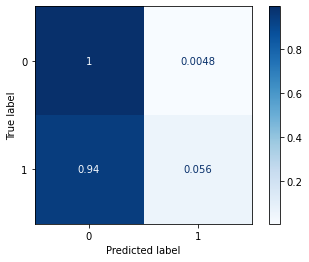

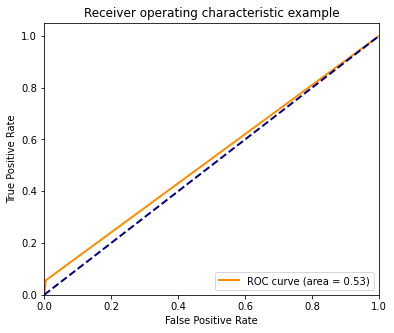

---------------------------------------------------------------------------



LogisticRegression(C=2.9, max_iter=2000)

accuracy=0.882, precision=0.776, recall=0.322, f1=0.455, roc_auc=0.653


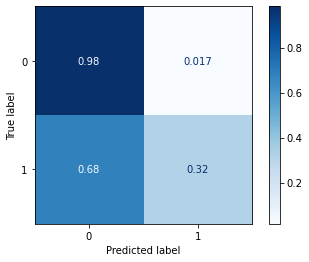

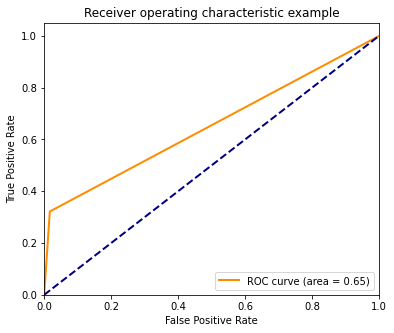

---------------------------------------------------------------------------



DecisionTreeClassifier(max_depth=4)

accuracy=0.903, precision=0.727, recall=0.588, f1=0.65, roc_auc=0.774


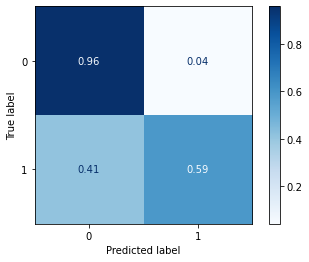

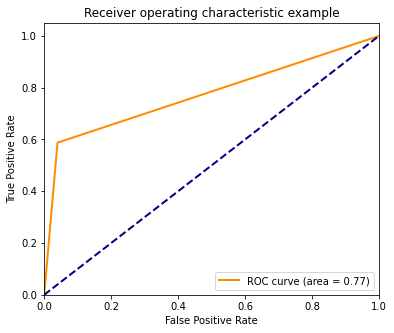

---------------------------------------------------------------------------



DecisionTreeClassifier(max_depth=5, max_features=13)

accuracy=0.892, precision=0.695, recall=0.527, f1=0.599, roc_auc=0.742


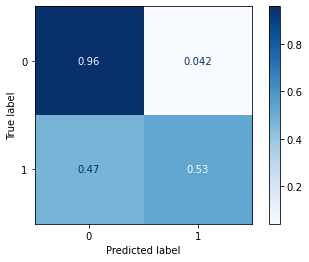

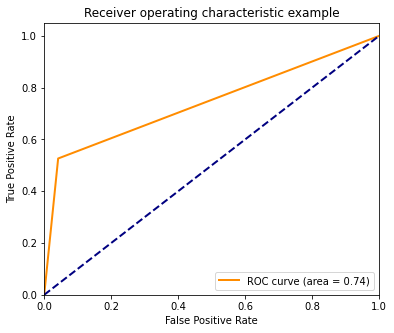

---------------------------------------------------------------------------



RandomForestClassifier(max_depth=14, max_features=10, min_samples_leaf=19,
                       n_estimators=1760)

accuracy=0.903, precision=0.728, recall=0.582, f1=0.647, roc_auc=0.772


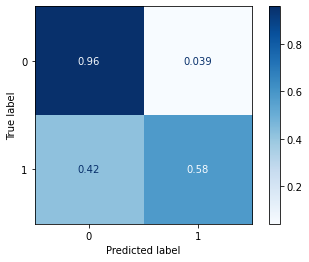

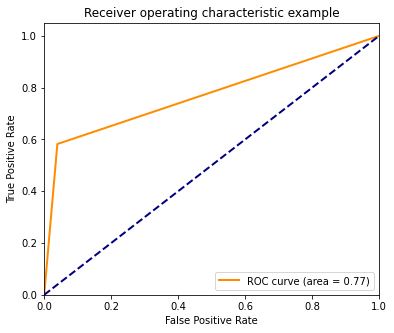

---------------------------------------------------------------------------



SVC(C=100, gamma=0.01)

accuracy=0.882, precision=0.759, recall=0.335, f1=0.465, roc_auc=0.658


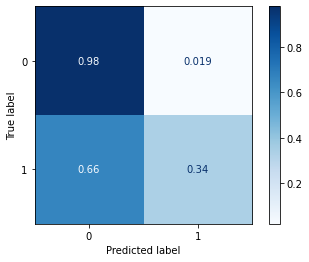

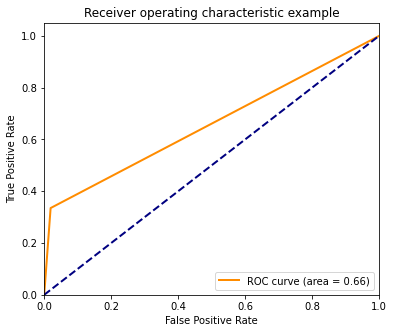

---------------------------------------------------------------------------



In [103]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

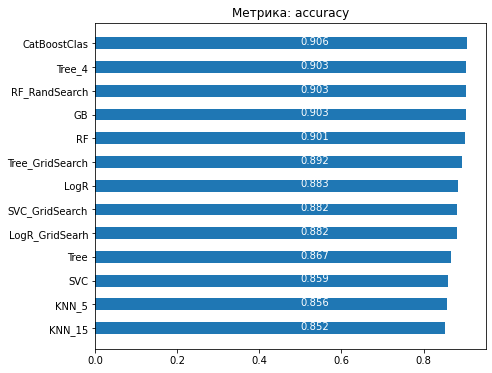

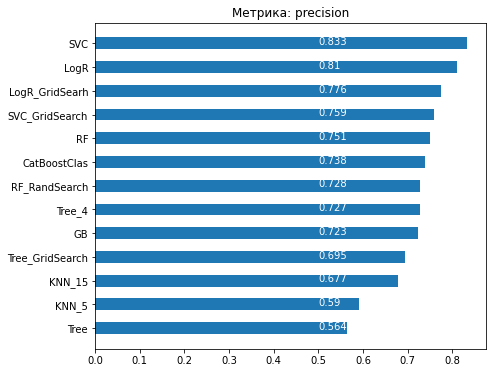

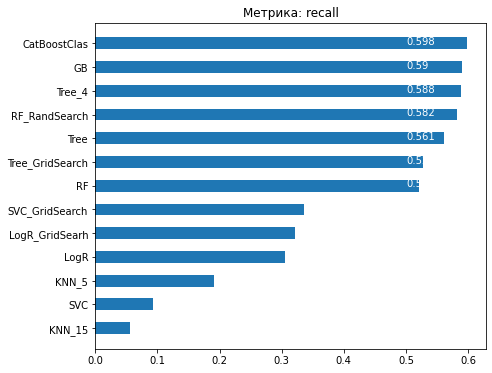

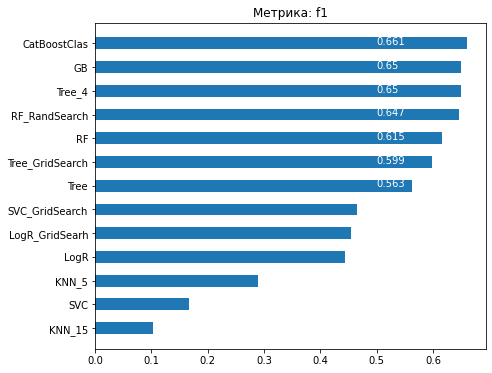

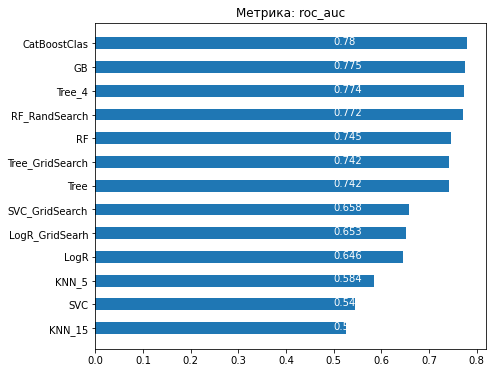

In [104]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Лучшие значения показали градиентный бустинг и деревья решений.